# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [7]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  13.8M      0 --:--:--  0:01:03 --:--:-- 14.4M


In [8]:
!rm SUSY.csv

In [9]:
!gunzip SUSY.csv.gz

In [10]:
ls -lh

total 4705600
-rw-r--r--  1 mannynathan  staff   389K Mar 21 14:30 Lab.7.ipynb
-rw-r--r--  1 mannynathan  staff   5.8M Mar 17 13:07 Lab.7.pdf
-rw-r--r--  1 mannynathan  staff   2.2G Mar 21 14:32 SUSY.csv


The data is provided as a comma separated file.

In [11]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [12]:
!ls -lh

total 4705600
-rw-r--r--  1 mannynathan  staff   389K Mar 21 14:30 Lab.7.ipynb
-rw-r--r--  1 mannynathan  staff   5.8M Mar 17 13:07 Lab.7.pdf
-rw-r--r--  1 mannynathan  staff   2.2G Mar 21 14:32 SUSY.csv


We see that we have 5 million datapoints.

In [13]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [14]:
!head -500000 SUSY.csv > SUSY-small.csv

In [15]:
ls -lh

total 5172456
-rw-r--r--  1 mannynathan  staff   389K Mar 21 14:30 Lab.7.ipynb
-rw-r--r--  1 mannynathan  staff   5.8M Mar 17 13:07 Lab.7.pdf
-rw-r--r--  1 mannynathan  staff   228M Mar 21 14:32 SUSY-small.csv
-rw-r--r--  1 mannynathan  staff   2.2G Mar 21 14:32 SUSY.csv


In [16]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [9]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [10]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [11]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [12]:
FeatureNames

['M_R',
 'M_Delta_R',
 'axial_MET',
 'M_TR_2',
 'dPhi_r_b',
 'R',
 'MT2',
 'MET_rel',
 'cos_theta_r1',
 'S_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [14]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [15]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [16]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


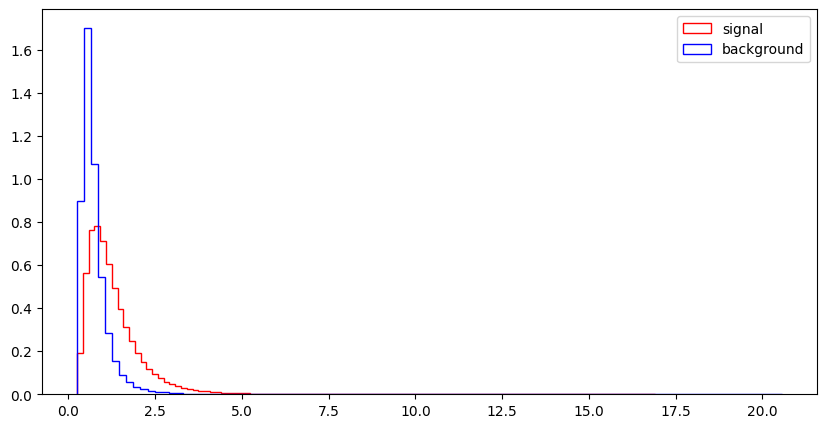

l_1_eta


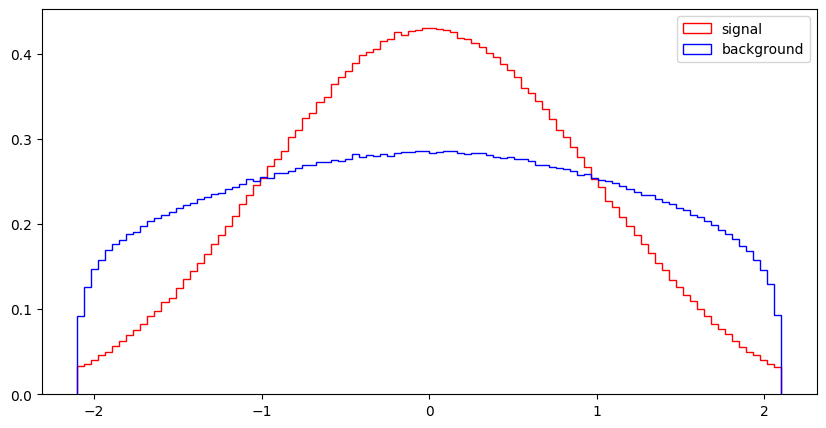

l_1_phi


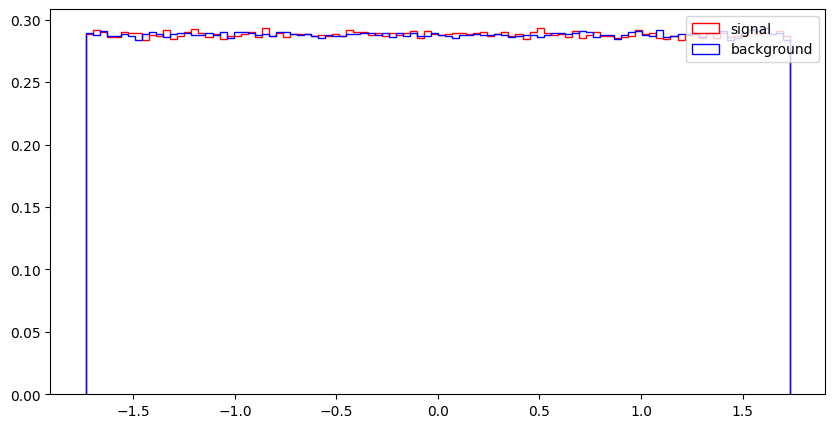

l_2_pT


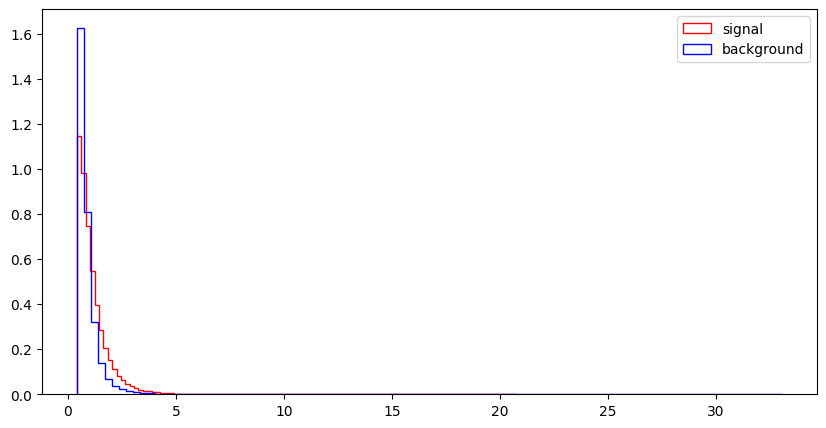

l_2_eta


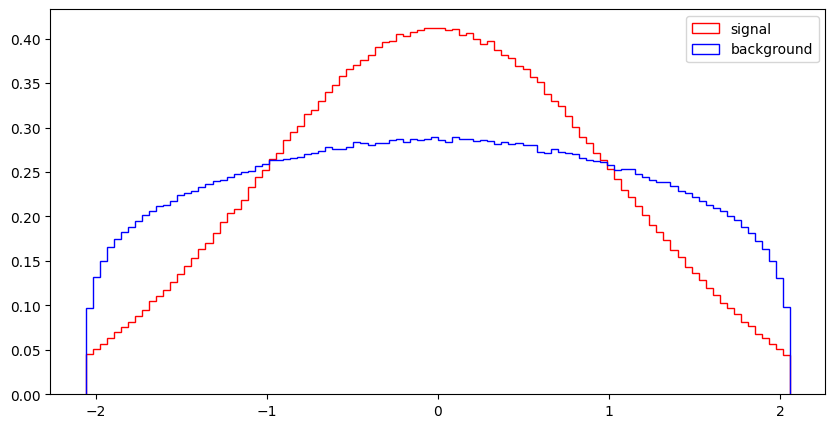

l_2_phi


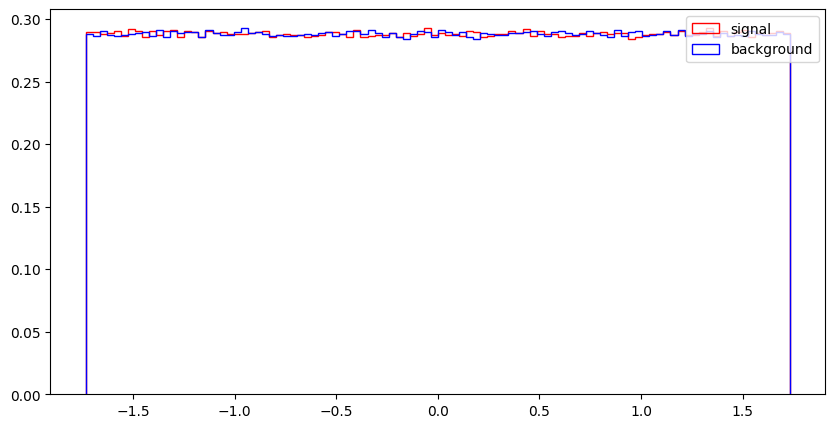

MET


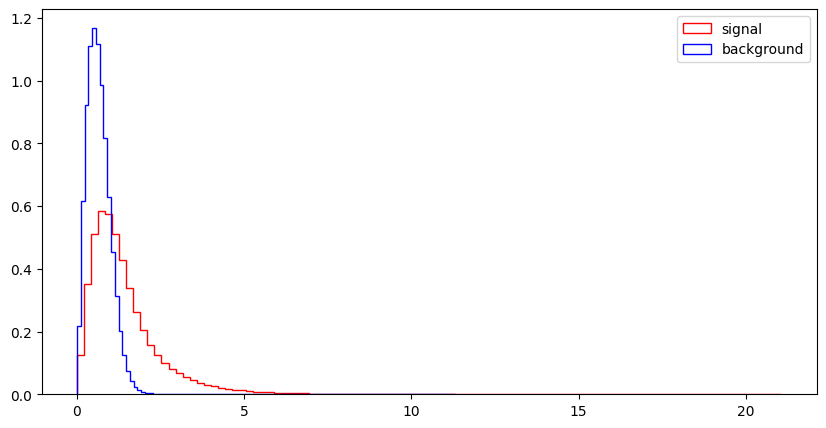

MET_phi


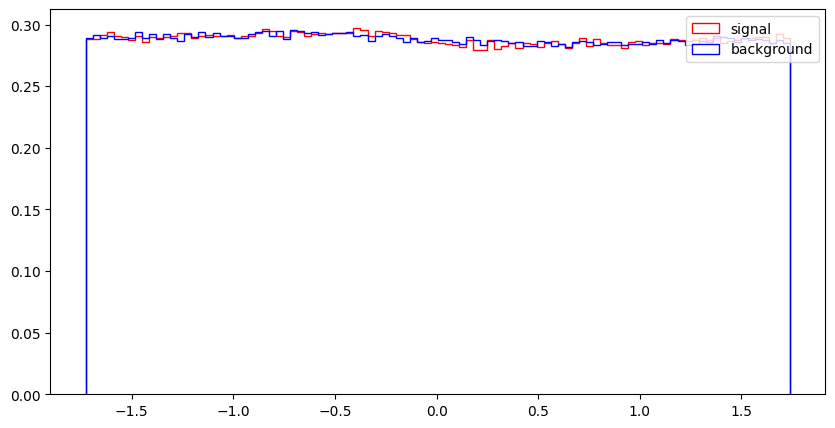

MET_rel


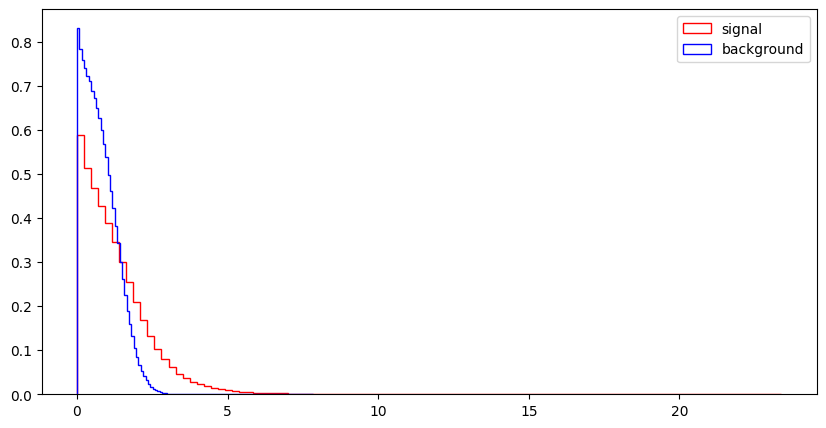

axial_MET


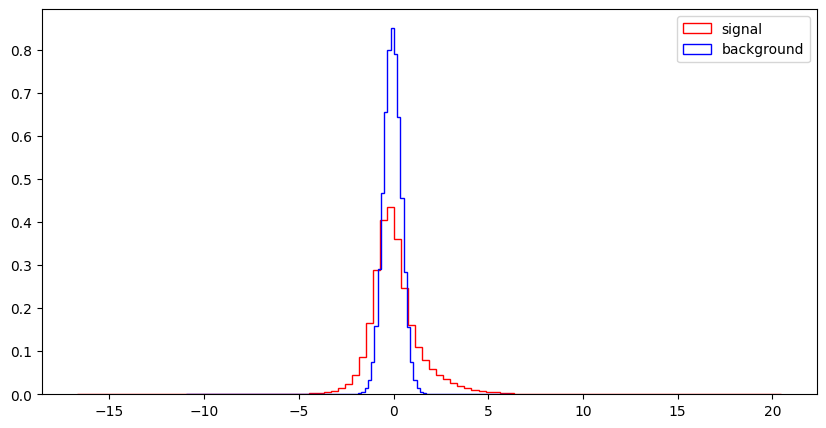

M_R


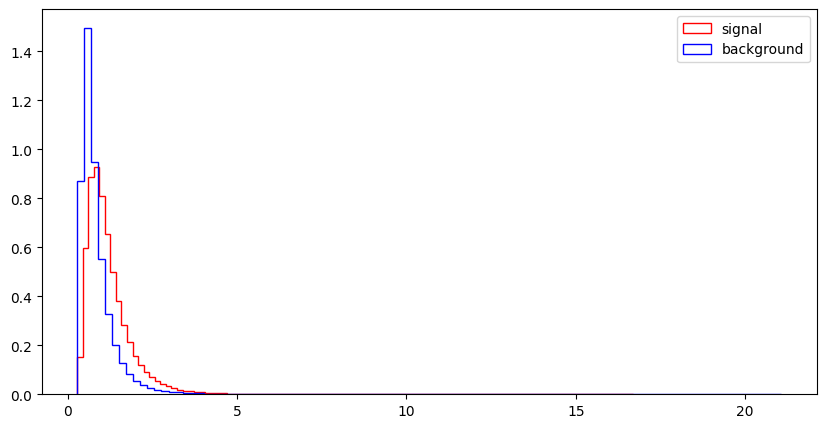

M_TR_2


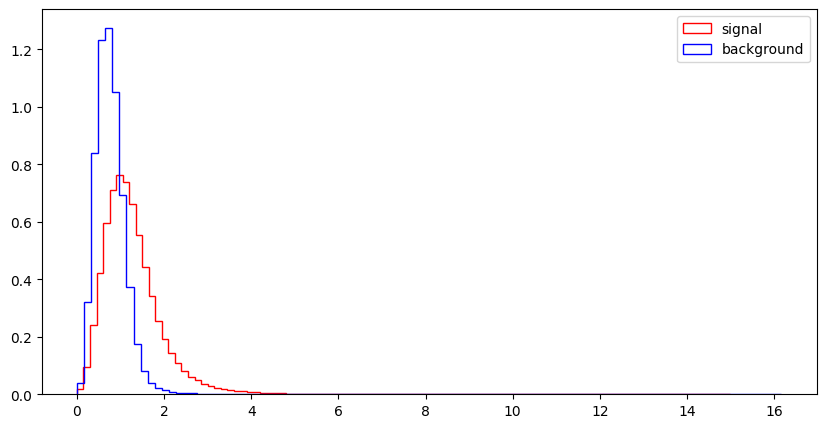

R


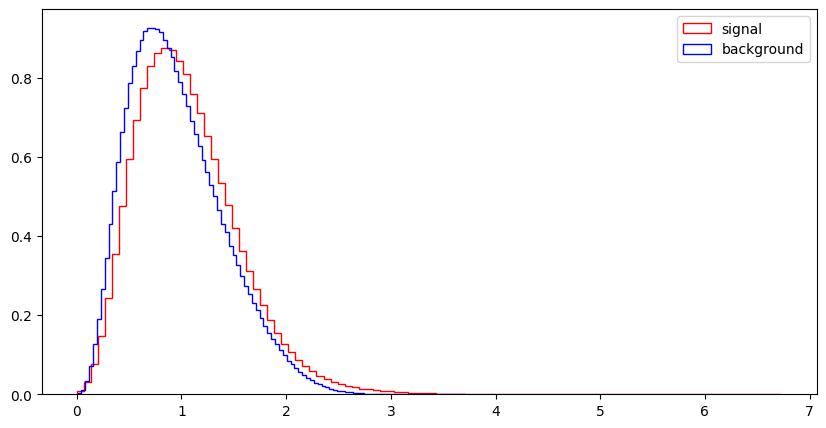

MT2


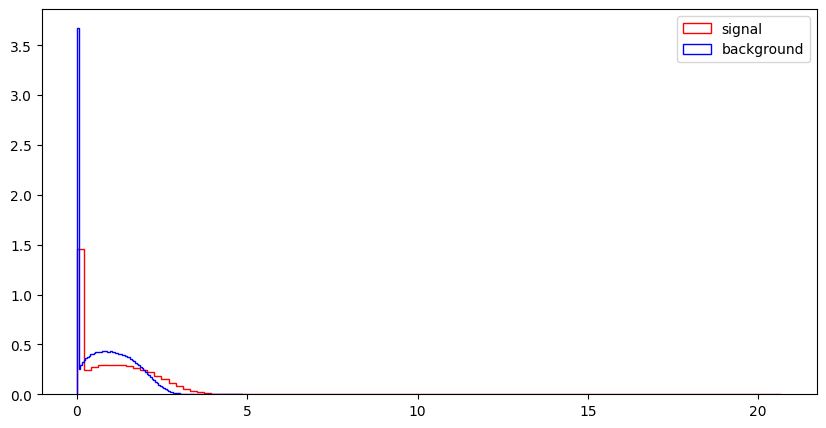

S_R


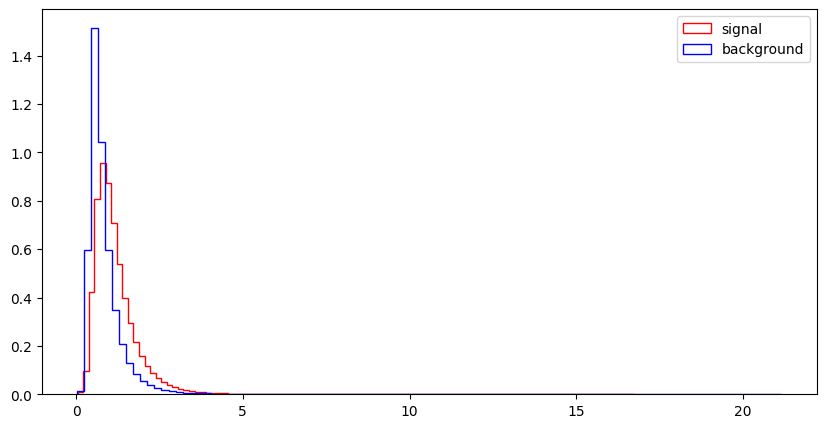

M_Delta_R


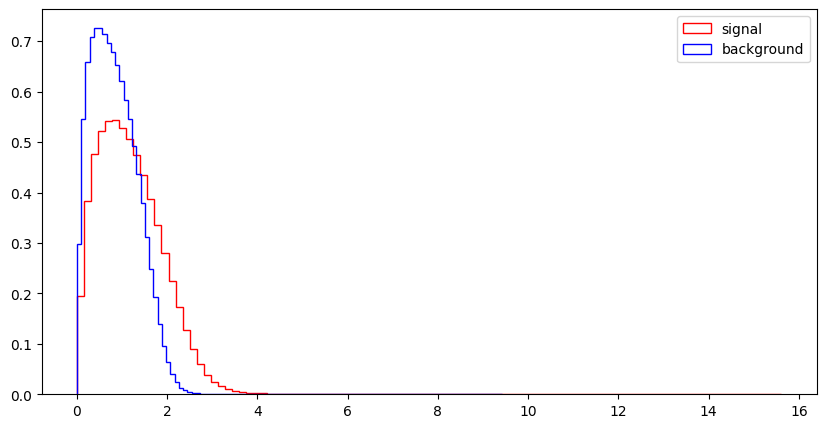

dPhi_r_b


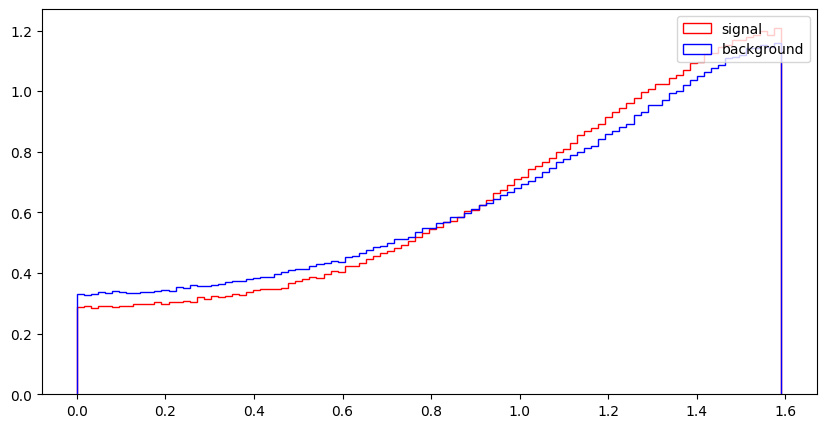

cos_theta_r1


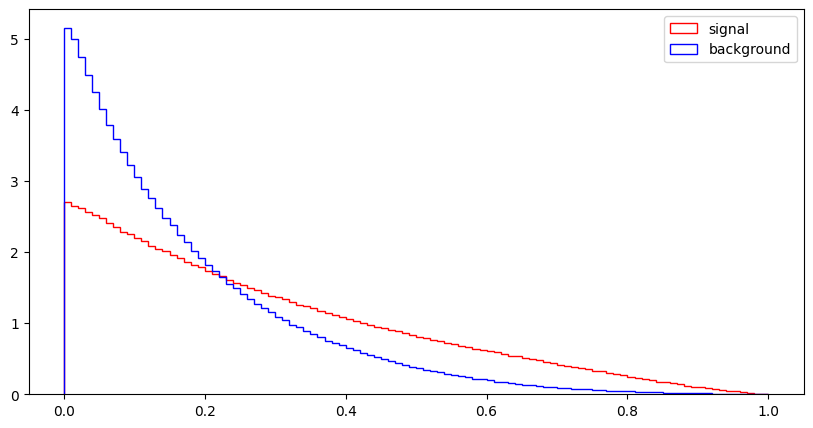

In [17]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [18]:
# Define column names manually (1 signal column + 18 feature columns)
VarNames = ["signal"] + [f"Feature_{i}" for i in range(1, 19)]

# Check if it’s defined correctly
print(VarNames)


['signal', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18']


In [19]:
df = pd.read_csv("SUSY-small.csv", dtype="float64", names=VarNames)


In [20]:
df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]


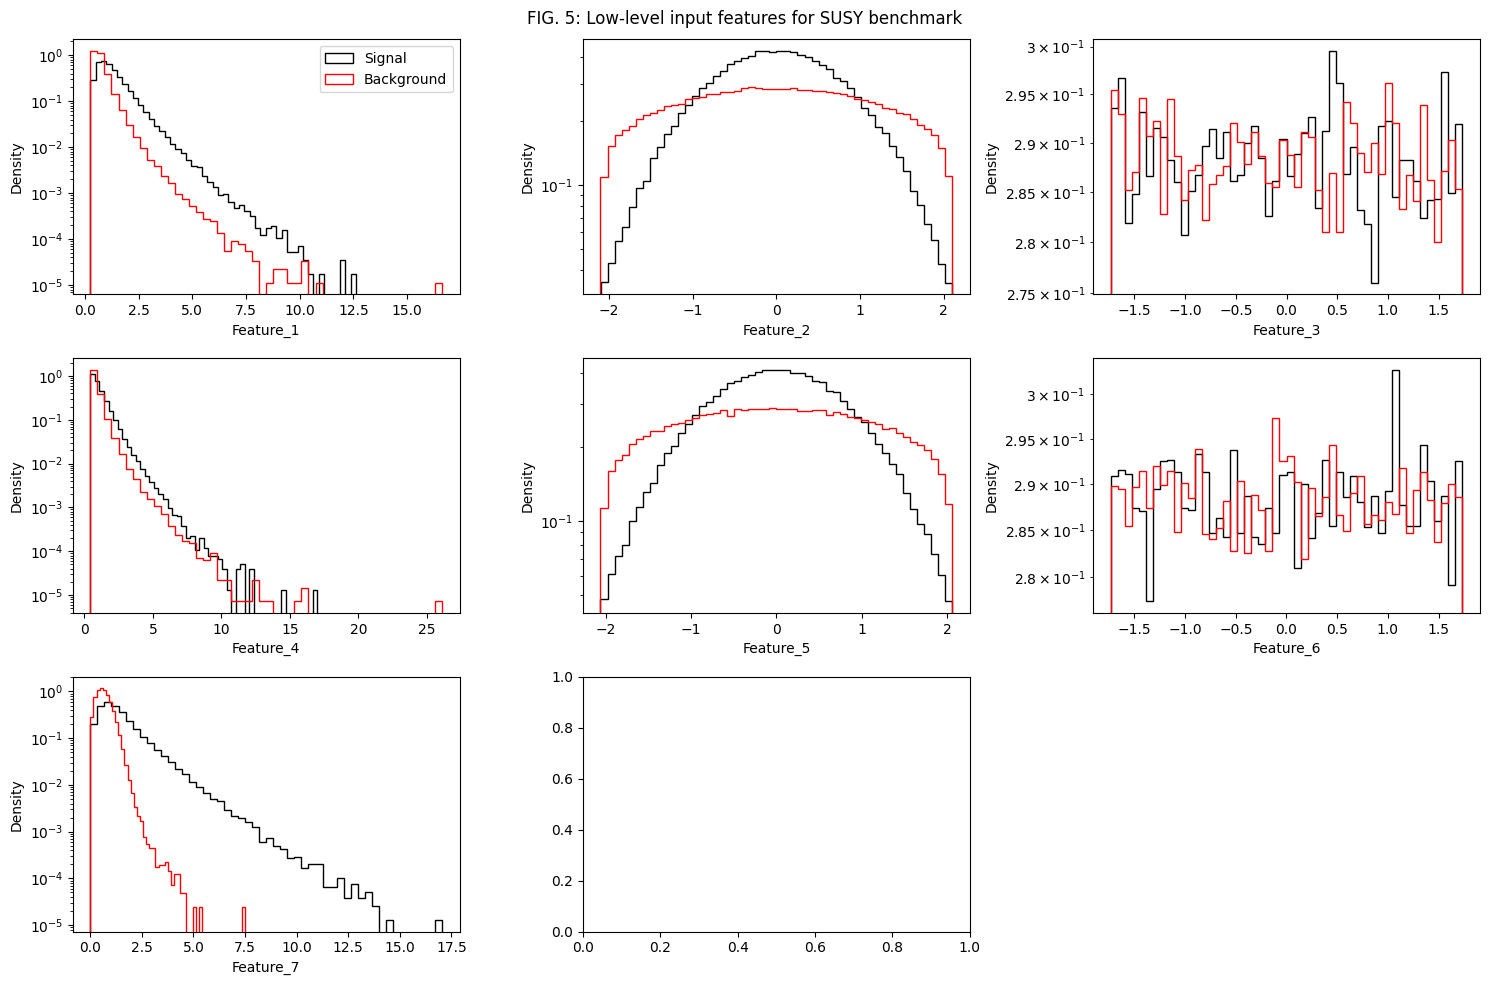

In [21]:
# Define low-level features (Columns 2-8)
low_level_features = VarNames[1:8]  

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust grid for 7 features

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(low_level_features):
    ax = axes[i]
    ax.hist(df_sig[feature], bins=50, color='black', histtype='step', density=True, label="Signal")
    ax.hist(df_bkg[feature], bins=50, color='red', histtype='step', density=True, label="Background")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_yscale("log")  # Use log scale for better visualization
    if i == 0:
        ax.legend()

# Remove unused subplot (since we have 7 features, not 6 or 8)
fig.delaxes(axes[-1])

plt.suptitle("FIG. 5: Low-level input features for SUSY benchmark")
plt.tight_layout()
plt.show()


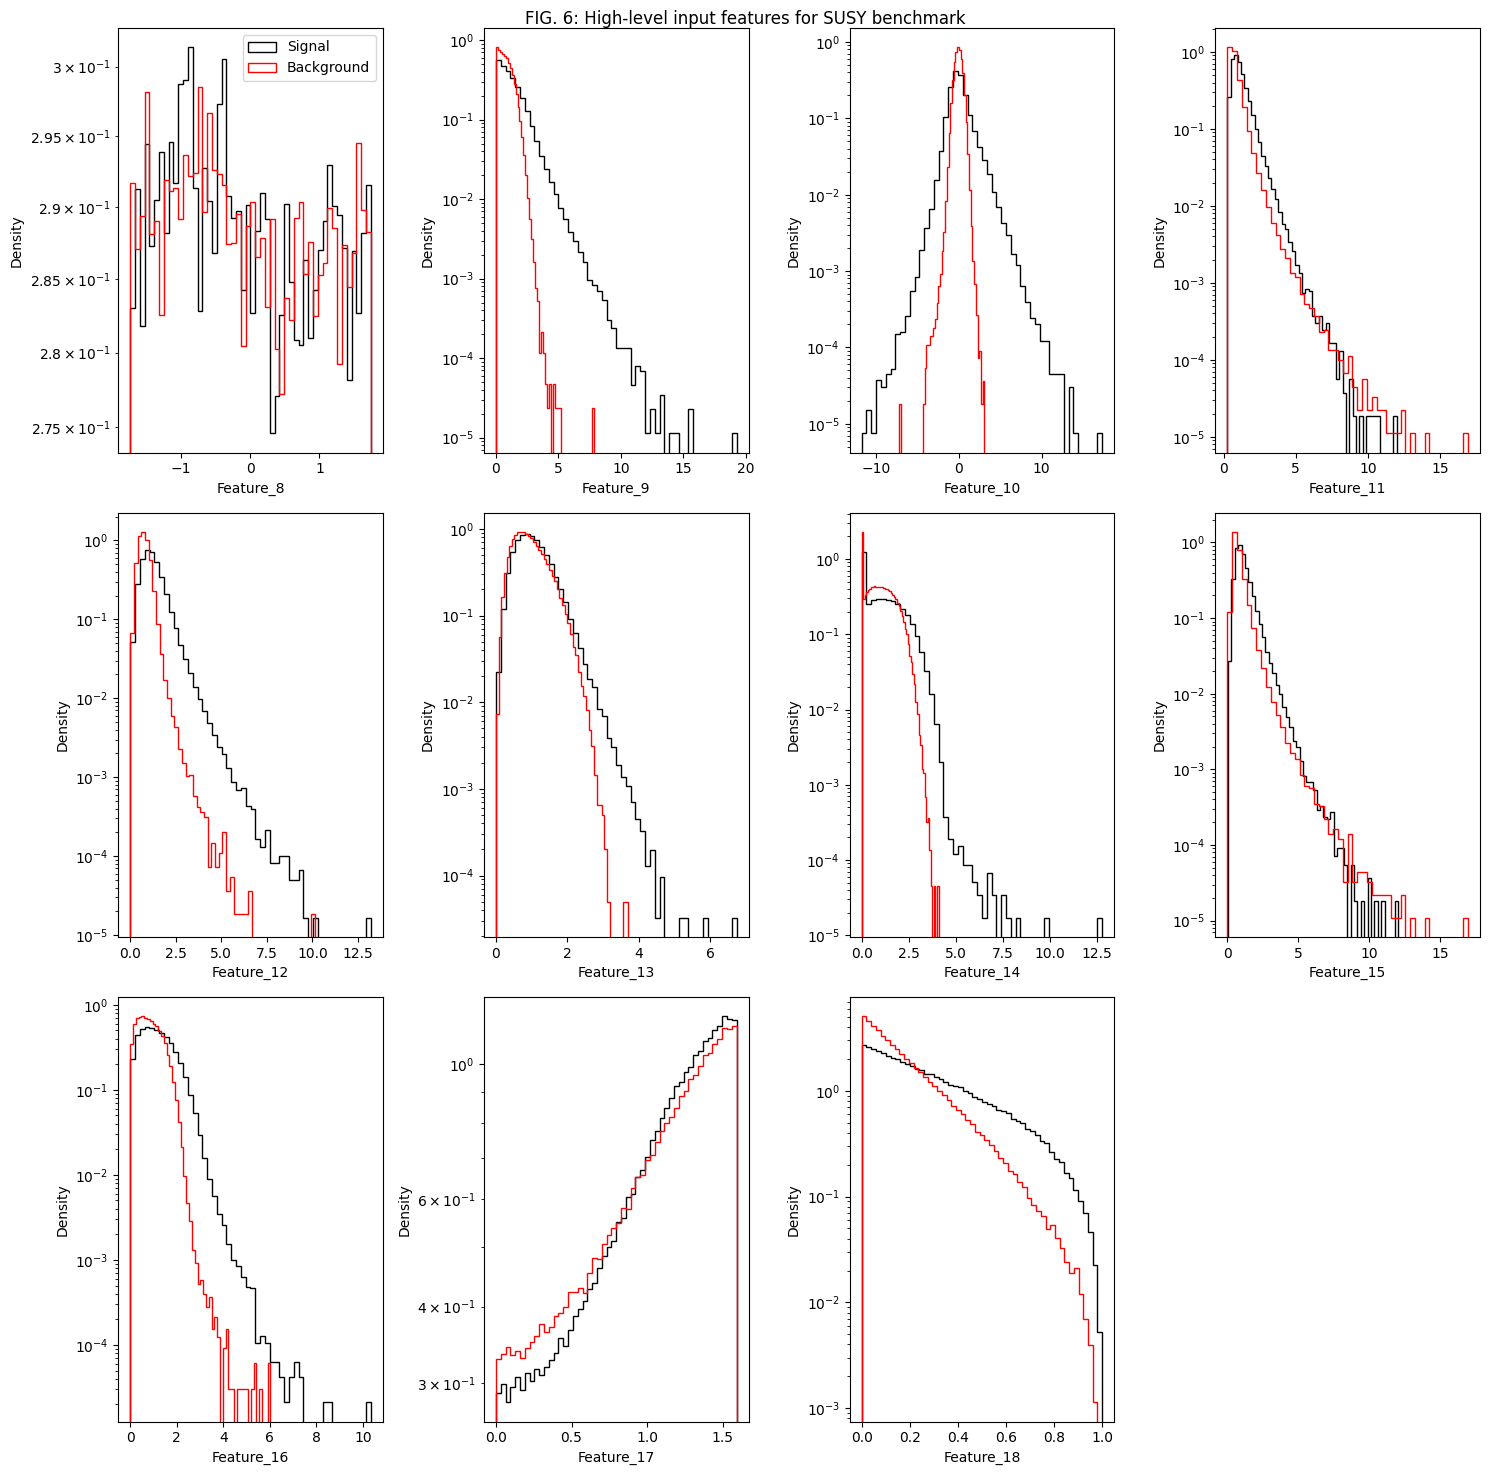

In [22]:
# Define high-level features (Columns 9-19)
high_level_features = VarNames[8:19]

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 15))  # Adjust grid for 11 features
axes = axes.flatten()

for i, feature in enumerate(high_level_features):
    ax = axes[i]
    ax.hist(df_sig[feature], bins=50, color='black', histtype='step', density=True, label="Signal")
    ax.hist(df_bkg[feature], bins=50, color='red', histtype='step', density=True, label="Background")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_yscale("log")  # Use log scale for better visualization
    if i == 0:
        ax.legend()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("FIG. 6: High-level input features for SUSY benchmark")
plt.tight_layout()
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [23]:
import matplotlib.pyplot as plt

def pair_plot(df, features, sample_size=5000):
    """
    Creates pair plots for the given features.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - features: List of feature names to plot.
    - sample_size: Number of points to sample for faster visualization.
    """
    num_features = len(features)
    
    # Take a small sample of the dataset to speed up plotting
    df_sampled = df.sample(n=sample_size, random_state=42)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))
    
    # Loop over feature pairs
    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]  # Select subplot
            
            if i == j:
                # Plot histograms on the diagonal
                ax.hist(df_sampled[features[i]], bins=50, color='gray', alpha=0.7, density=True)
                ax.set_ylabel("Density")
            else:
                # Scatter plot for non-diagonal elements
                ax.scatter(df_sampled[features[j]], df_sampled[features[i]], s=1, alpha=0.5, color='black')

            # Labels
            if j == 0:
                ax.set_ylabel(features[i])
            if i == num_features - 1:
                ax.set_xlabel(features[j])

    plt.suptitle("Pair Plot of Selected Features", fontsize=16)
    plt.tight_layout()
    plt.show()


Pair plot for Low-Level Features:


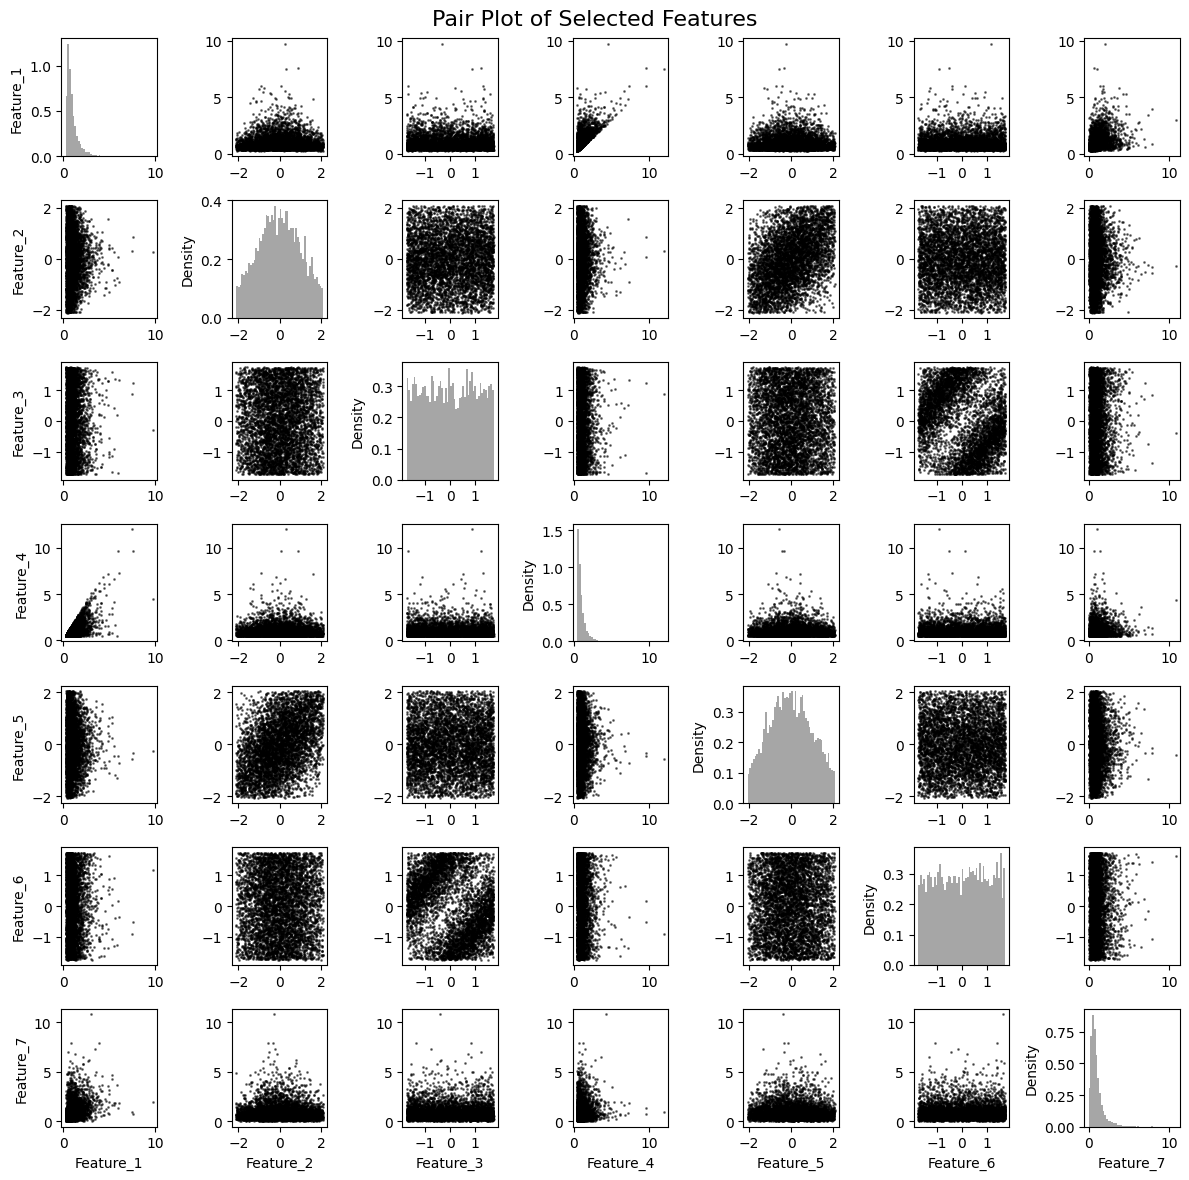

Pair plot for High-Level Features:


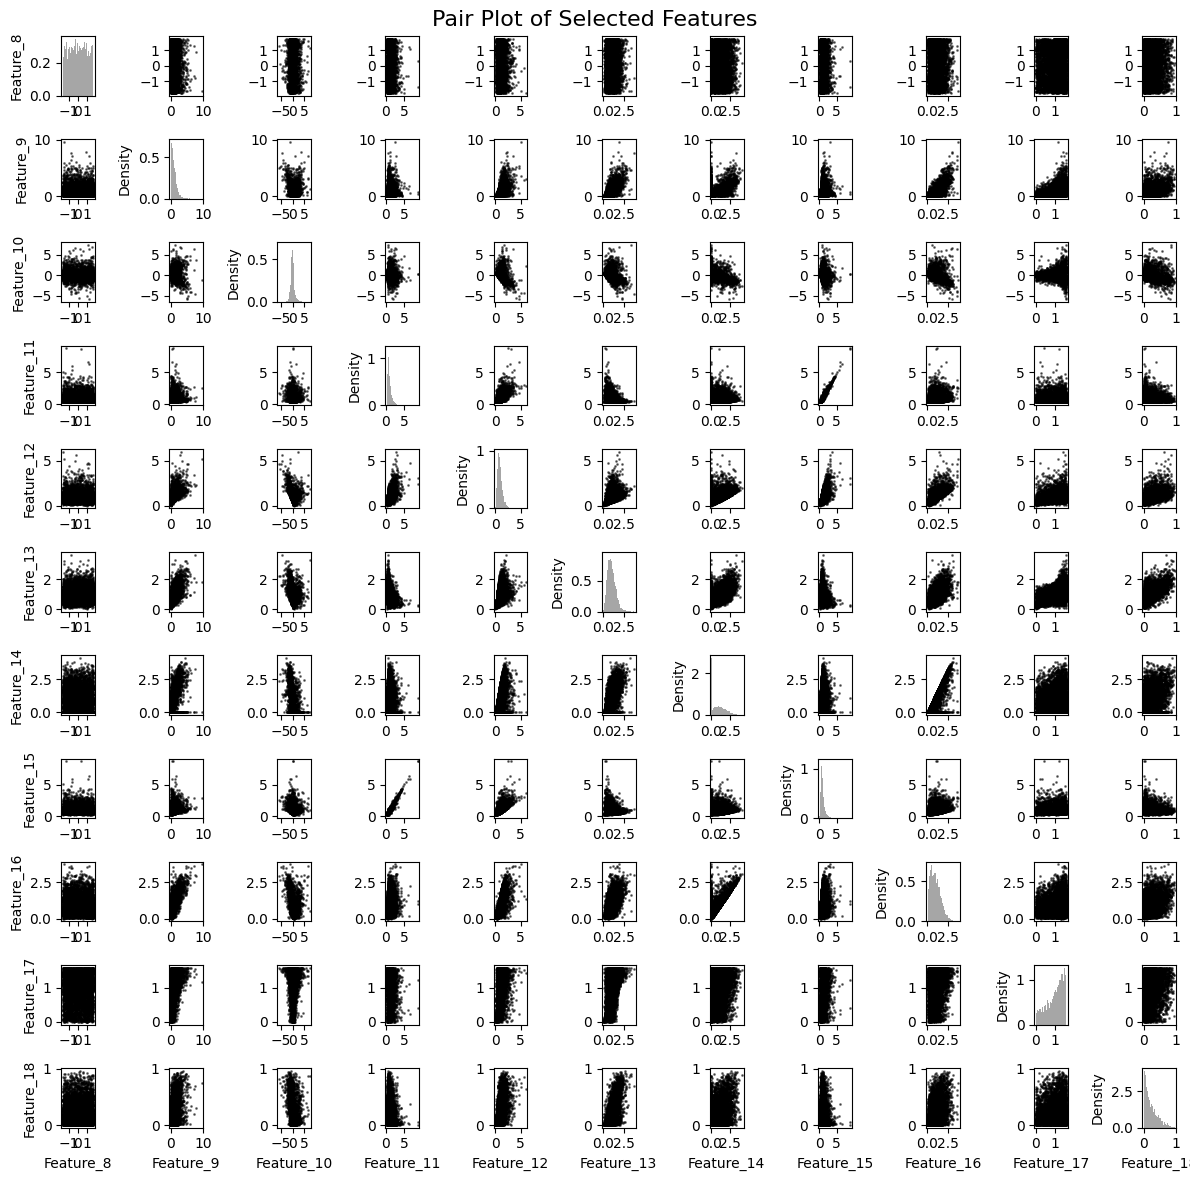

In [24]:
# Define low and high-level features
low_level_features = VarNames[1:8]   # Columns 2-8
high_level_features = VarNames[8:19] # Columns 9-19

# Create pair plots
print("Pair plot for Low-Level Features:")
pair_plot(df, low_level_features)

print("Pair plot for High-Level Features:")
pair_plot(df, high_level_features)


In [25]:
def fast_pair_plot(df, features, sample_size=5000):
    """
    Faster version of pair plots using 2D histograms instead of scatter plots.
    """
    num_features = len(features)
    df_sampled = df.sample(n=sample_size, random_state=42)

    fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]

            if i == j:
                ax.hist(df_sampled[features[i]], bins=50, color='gray', alpha=0.7, density=True)
            else:
                ax.hexbin(df_sampled[features[j]], df_sampled[features[i]], gridsize=30, cmap='Greys')

            if j == 0:
                ax.set_ylabel(features[i])
            if i == num_features - 1:
                ax.set_xlabel(features[j])

    plt.suptitle("Optimized Pair Plot of Selected Features", fontsize=16)
    plt.tight_layout()
    plt.show()


Fast Pair Plot for Low-Level Features:


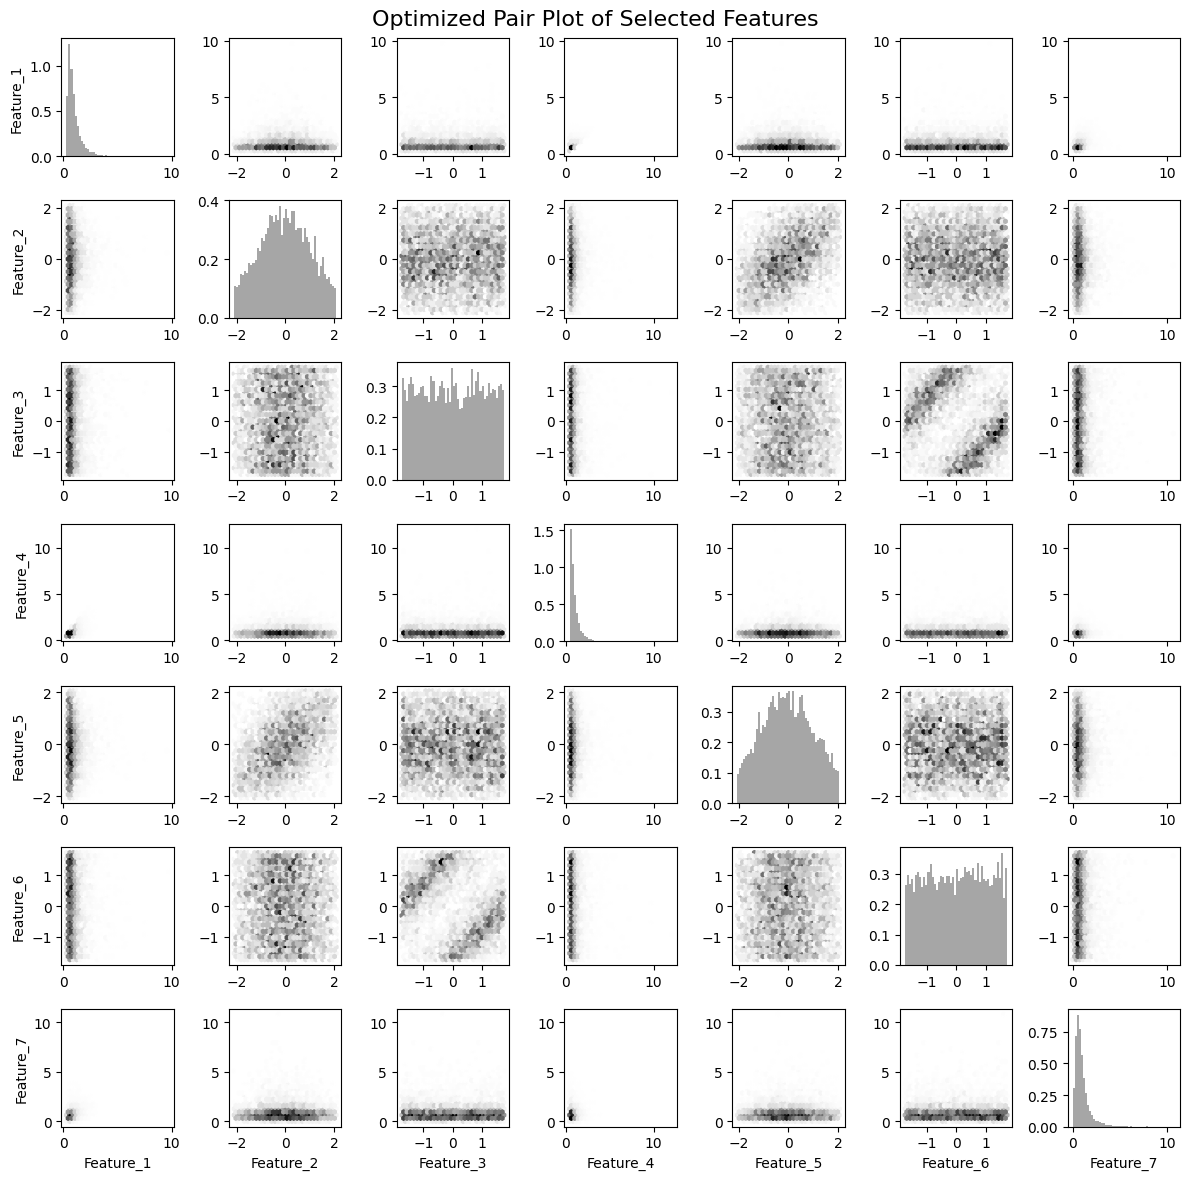

Fast Pair Plot for High-Level Features:


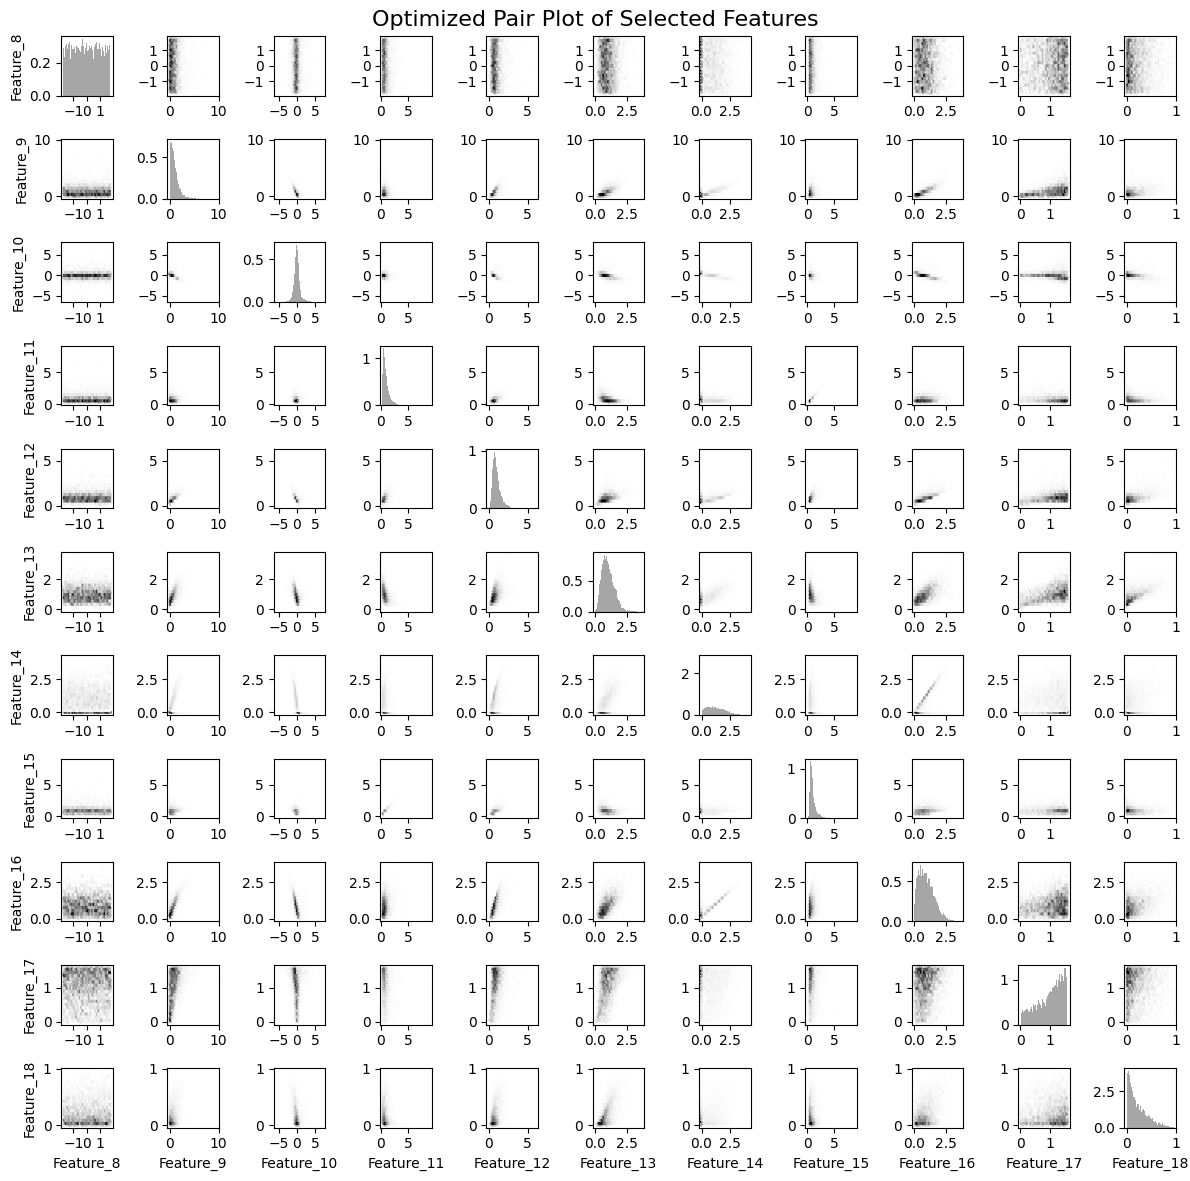

In [26]:
print("Fast Pair Plot for Low-Level Features:")
fast_pair_plot(df, low_level_features)

print("Fast Pair Plot for High-Level Features:")
fast_pair_plot(df, high_level_features)


In [27]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation of features with the 'signal' column
correlation_with_signal = correlation_matrix["signal"].abs().sort_values(ascending=False)
print(correlation_with_signal)


signal        1.000000
Feature_7     0.439725
Feature_12    0.425832
Feature_1     0.391075
Feature_9     0.283162
Feature_16    0.274235
Feature_11    0.270347
Feature_18    0.266836
Feature_15    0.261762
Feature_4     0.196651
Feature_13    0.109128
Feature_14    0.079766
Feature_10    0.079145
Feature_17    0.032801
Feature_5     0.001426
Feature_8     0.000590
Feature_3     0.000433
Feature_2     0.000425
Feature_6     0.000339
Name: signal, dtype: float64


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [28]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [29]:
!pip install tabulate


In [30]:
import numpy as np

features = df.columns[1:]
X = df[features].values

low_X = X[:, :18]
high_X = X[:, 18:]

cov_all  = np.cov(X,    rowvar=False)
corr_all = np.corrcoef(X, rowvar=False)

cov_low  = np.cov(low_X, rowvar=False)
corr_low = np.corrcoef(low_X, rowvar=False)

cov_high  = np.cov(high_X, rowvar=False)
corr_high = np.corrcoef(high_X, rowvar=False)


In [31]:
from tabulate import tabulate
from IPython.display import HTML, display

def display_matrix(mat, names, title):
    headers = [""] + list(names)
    table = [[names[i]] + [f"{mat[i,j]:.3f}" for j in range(len(names))] 
             for i in range(len(names))]
    display(HTML(f"<h3>{title}</h3>"))
    display(HTML(tabulate(table, headers=headers, tablefmt='html')))

# All features
display_matrix(cov_all, features, "Covariance: All Features")
display_matrix(corr_all, features, "Correlation: All Features")

# Low‑level
display_matrix(cov_low, features[:18], "Covariance: Low‑Level")
display_matrix(corr_low, features[:18], "Correlation: Low‑Level")

# High‑level
display_matrix(cov_high, features[18:], "Covariance: High‑Level")
display_matrix(corr_high, features[18:], "Correlation: High‑Level")


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,0.467,-0,0,0.305,-0,0.001,0.228,-0.001,0.098,-0.01,0.364,0.287,-0.06,-0.012,0.343,0.098,-0.047,0.022
Feature_2,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,0,0,-0.001,-0.001,-0.001,0
Feature_3,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185,0.001,-0.002,0.001,0.001,0,0.001,0.001,0.001,0.001,0
Feature_4,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002,-0.001,0.051,0.325,0.163,-0.099,-0.069,0.322,0.006,-0.004,-0.028
Feature_5,-0,0.408,0,-0.001,1.006,0,0,-0,0.001,-0.001,-0.001,0,0,0.001,-0.001,0.001,-0,0
Feature_6,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0,0
Feature_7,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146,0.073
Feature_8,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002,0
Feature_9,0.098,-0.001,0.001,-0.001,0.001,0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146,0.055
Feature_10,-0.01,-0.001,-0.002,0.051,-0.001,-0.002,0.154,-0,-0.12,1.005,0.017,-0.185,-0.181,-0.461,-0.041,-0.233,-0.025,-0.054


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001,0.16,-0.014,0.851,0.723,-0.186,-0.021,0.811,0.229,-0.157,0.165
Feature_2,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,0.001,0,-0.001,-0.002,-0.002,0.002
Feature_3,0,-0.001,1,0.002,0,-0.266,0.001,-0.184,0.001,-0.002,0.002,0.001,0,0.001,0.002,0.001,0.002,0.001
Feature_4,0.684,-0,0.002,1,-0.001,0,0.14,-0.002,-0.001,0.078,0.797,0.43,-0.324,-0.123,0.799,0.014,-0.013,-0.217
Feature_5,-0.001,0.406,0,-0.001,1,0,0,-0,0.001,-0.001,-0.001,0,0.001,0.002,-0.001,0.001,-0.001,0.001
Feature_6,0.001,-0.001,-0.266,0,0,1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001,0
Feature_7,0.383,-0.002,0.001,0.14,0,-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383,0.425
Feature_8,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004,0.001
Feature_9,0.16,-0.002,0.001,-0.001,0.001,0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
Feature_10,-0.014,-0.001,-0.002,0.078,-0.001,-0.002,0.176,-0,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,0.467,-0,0,0.305,-0,0.001,0.228,-0.001,0.098,-0.01,0.364,0.287,-0.06,-0.012,0.343,0.098,-0.047,0.022
Feature_2,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,0,0,-0.001,-0.001,-0.001,0
Feature_3,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185,0.001,-0.002,0.001,0.001,0,0.001,0.001,0.001,0.001,0
Feature_4,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002,-0.001,0.051,0.325,0.163,-0.099,-0.069,0.322,0.006,-0.004,-0.028
Feature_5,-0,0.408,0,-0.001,1.006,0,0,-0,0.001,-0.001,-0.001,0,0,0.001,-0.001,0.001,-0,0
Feature_6,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0,0
Feature_7,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146,0.073
Feature_8,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002,0
Feature_9,0.098,-0.001,0.001,-0.001,0.001,0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146,0.055
Feature_10,-0.01,-0.001,-0.002,0.051,-0.001,-0.002,0.154,-0,-0.12,1.005,0.017,-0.185,-0.181,-0.461,-0.041,-0.233,-0.025,-0.054


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001,0.16,-0.014,0.851,0.723,-0.186,-0.021,0.811,0.229,-0.157,0.165
Feature_2,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,0.001,0,-0.001,-0.002,-0.002,0.002
Feature_3,0,-0.001,1,0.002,0,-0.266,0.001,-0.184,0.001,-0.002,0.002,0.001,0,0.001,0.002,0.001,0.002,0.001
Feature_4,0.684,-0,0.002,1,-0.001,0,0.14,-0.002,-0.001,0.078,0.797,0.43,-0.324,-0.123,0.799,0.014,-0.013,-0.217
Feature_5,-0.001,0.406,0,-0.001,1,0,0,-0,0.001,-0.001,-0.001,0,0.001,0.002,-0.001,0.001,-0.001,0.001
Feature_6,0.001,-0.001,-0.266,0,0,1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001,0
Feature_7,0.383,-0.002,0.001,0.14,0,-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383,0.425
Feature_8,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004,0.001
Feature_9,0.16,-0.002,0.001,-0.001,0.001,0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
Feature_10,-0.014,-0.001,-0.002,0.078,-0.001,-0.002,0.176,-0,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272


In [32]:
def compute_and_show(dataset, feature_names, title_prefix=""):
    cov = np.cov(dataset, rowvar=False)
    corr = np.corrcoef(dataset, rowvar=False)
    display_matrix(cov, feature_names, f"{title_prefix} Covariance")
    display_matrix(corr, feature_names, f"{title_prefix} Correlation")

# Example usage:
compute_and_show(X, features, "All Features")
compute_and_show(low_X, features[:18], "Low-Level")
compute_and_show(high_X, features[18:], "High-Level")


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,0.467,-0,0,0.305,-0,0.001,0.228,-0.001,0.098,-0.01,0.364,0.287,-0.06,-0.012,0.343,0.098,-0.047,0.022
Feature_2,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,0,0,-0.001,-0.001,-0.001,0
Feature_3,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185,0.001,-0.002,0.001,0.001,0,0.001,0.001,0.001,0.001,0
Feature_4,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002,-0.001,0.051,0.325,0.163,-0.099,-0.069,0.322,0.006,-0.004,-0.028
Feature_5,-0,0.408,0,-0.001,1.006,0,0,-0,0.001,-0.001,-0.001,0,0,0.001,-0.001,0.001,-0,0
Feature_6,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0,0
Feature_7,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146,0.073
Feature_8,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002,0
Feature_9,0.098,-0.001,0.001,-0.001,0.001,0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146,0.055
Feature_10,-0.01,-0.001,-0.002,0.051,-0.001,-0.002,0.154,-0,-0.12,1.005,0.017,-0.185,-0.181,-0.461,-0.041,-0.233,-0.025,-0.054


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001,0.16,-0.014,0.851,0.723,-0.186,-0.021,0.811,0.229,-0.157,0.165
Feature_2,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,0.001,0,-0.001,-0.002,-0.002,0.002
Feature_3,0,-0.001,1,0.002,0,-0.266,0.001,-0.184,0.001,-0.002,0.002,0.001,0,0.001,0.002,0.001,0.002,0.001
Feature_4,0.684,-0,0.002,1,-0.001,0,0.14,-0.002,-0.001,0.078,0.797,0.43,-0.324,-0.123,0.799,0.014,-0.013,-0.217
Feature_5,-0.001,0.406,0,-0.001,1,0,0,-0,0.001,-0.001,-0.001,0,0.001,0.002,-0.001,0.001,-0.001,0.001
Feature_6,0.001,-0.001,-0.266,0,0,1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001,0
Feature_7,0.383,-0.002,0.001,0.14,0,-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383,0.425
Feature_8,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004,0.001
Feature_9,0.16,-0.002,0.001,-0.001,0.001,0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
Feature_10,-0.014,-0.001,-0.002,0.078,-0.001,-0.002,0.176,-0,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,0.467,-0,0,0.305,-0,0.001,0.228,-0.001,0.098,-0.01,0.364,0.287,-0.06,-0.012,0.343,0.098,-0.047,0.022
Feature_2,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,0,0,-0.001,-0.001,-0.001,0
Feature_3,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185,0.001,-0.002,0.001,0.001,0,0.001,0.001,0.001,0.001,0
Feature_4,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002,-0.001,0.051,0.325,0.163,-0.099,-0.069,0.322,0.006,-0.004,-0.028
Feature_5,-0,0.408,0,-0.001,1.006,0,0,-0,0.001,-0.001,-0.001,0,0,0.001,-0.001,0.001,-0,0
Feature_6,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0,0
Feature_7,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146,0.073
Feature_8,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002,0
Feature_9,0.098,-0.001,0.001,-0.001,0.001,0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146,0.055
Feature_10,-0.01,-0.001,-0.002,0.051,-0.001,-0.002,0.154,-0,-0.12,1.005,0.017,-0.185,-0.181,-0.461,-0.041,-0.233,-0.025,-0.054


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
Feature_1,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001,0.16,-0.014,0.851,0.723,-0.186,-0.021,0.811,0.229,-0.157,0.165
Feature_2,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,0.001,0,-0.001,-0.002,-0.002,0.002
Feature_3,0,-0.001,1,0.002,0,-0.266,0.001,-0.184,0.001,-0.002,0.002,0.001,0,0.001,0.002,0.001,0.002,0.001
Feature_4,0.684,-0,0.002,1,-0.001,0,0.14,-0.002,-0.001,0.078,0.797,0.43,-0.324,-0.123,0.799,0.014,-0.013,-0.217
Feature_5,-0.001,0.406,0,-0.001,1,0,0,-0,0.001,-0.001,-0.001,0,0.001,0.002,-0.001,0.001,-0.001,0.001
Feature_6,0.001,-0.001,-0.266,0,0,1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001,0
Feature_7,0.383,-0.002,0.001,0.14,0,-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383,0.425
Feature_8,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004,0.001
Feature_9,0.16,-0.002,0.001,-0.001,0.001,0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
Feature_10,-0.014,-0.001,-0.002,0.078,-0.001,-0.002,0.176,-0,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML

# Assume the first column is the label (1 = signal, 0 = background)
label_col = df.columns[0]
feature_cols = df.columns[1:]

# Split into signal and background DataFrames.
signal_df = df[df[label_col] == 1]
background_df = df[df[label_col] == 0]

# Choose the top three observables (features) for our analysis.
chosen_obs = feature_cols[:3]
print("Chosen observables:", chosen_obs.tolist())

# For convenience, convert these observables into NumPy arrays.
# Each will be a 1D array of values.
signal_values = {obs: signal_df[obs].values for obs in chosen_obs}
background_values = {obs: background_df[obs].values for obs in chosen_obs}


Chosen observables: ['Feature_1', 'Feature_2', 'Feature_3']


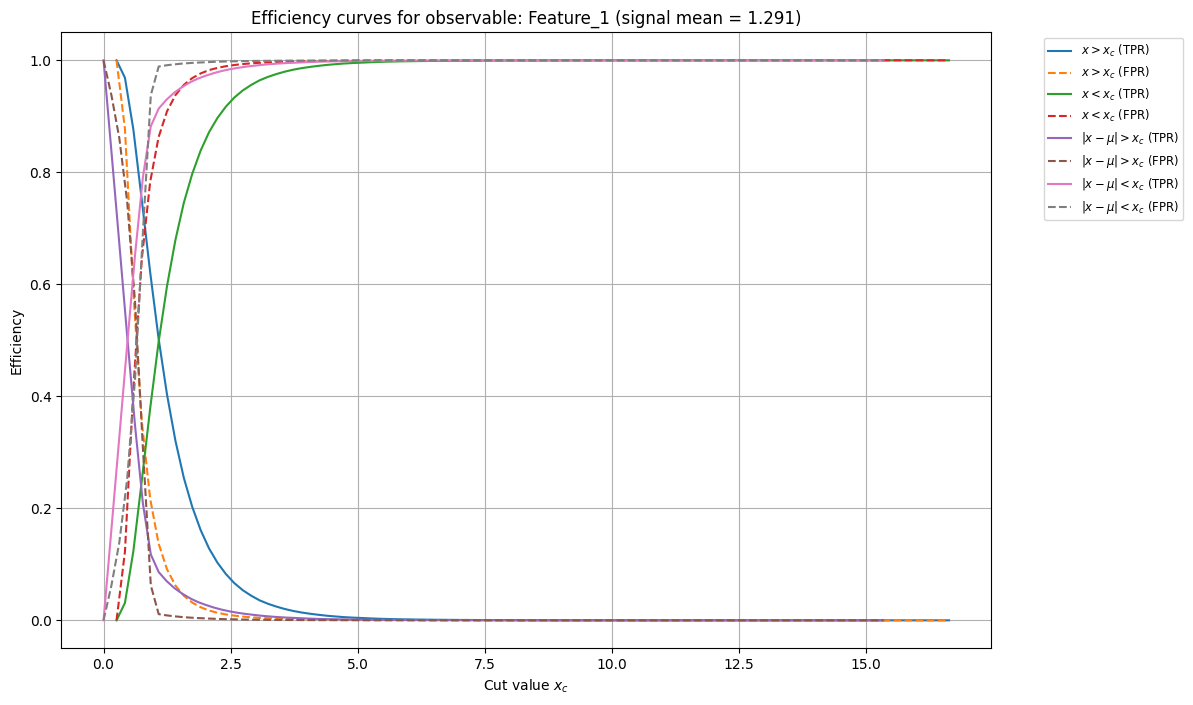

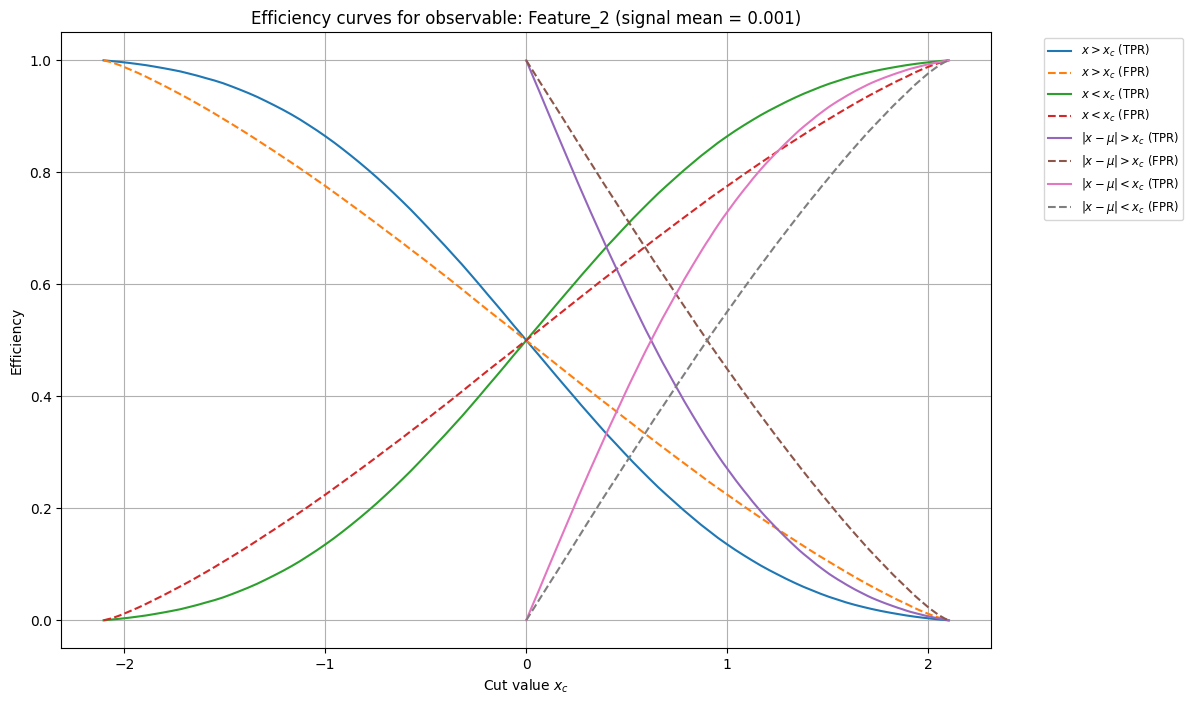

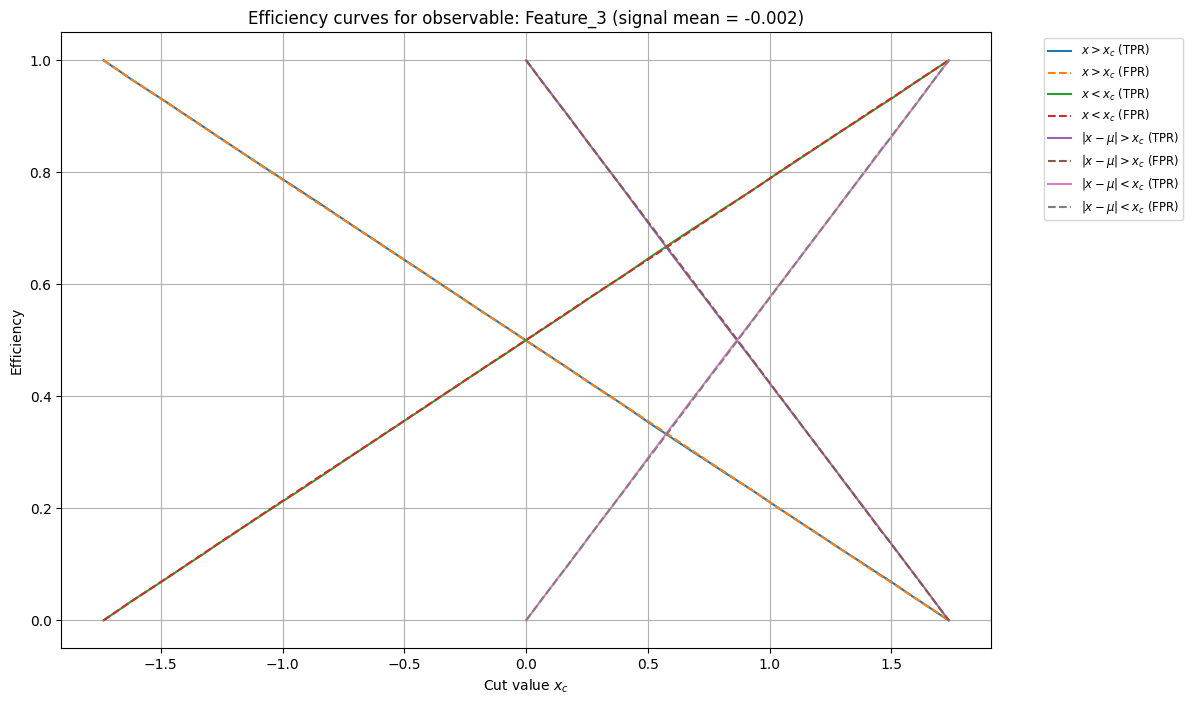

In [55]:
import matplotlib.pyplot as plt

# Define selection functions for a given observable "x", its cut value xc, and its signal mean mu.
sel_gt = lambda x, xc: x > xc             # x > xc
sel_lt = lambda x, xc: x < xc             # x < xc
sel_abs_gt = lambda x, xc, mu: np.abs(x - mu) > xc  # |x - mu| > xc
sel_abs_lt = lambda x, xc, mu: np.abs(x - mu) < xc  # |x - mu| < xc

# Create a dictionary of selection strategies.
# The keys are labels, and the values are tuples: (selection_function, range_type)
# For "gt" and "lt", x_c will be scanned over the range of x.
# For the absolute selections, x_c will be scanned from 0 to the maximum absolute deviation.
strategies = {
    r"$x > x_c$": (sel_gt, "range"),
    r"$x < x_c$": (sel_lt, "range"),
    r"$|x-\mu| > x_c$": (sel_abs_gt, "dev"),
    r"$|x-\mu| < x_c$": (sel_abs_lt, "dev")
}

# Loop over observables.
for obs in chosen_obs:
    sig = signal_values[obs]
    bkg = background_values[obs]
    mu = np.mean(sig)
    
    # Determine scan range:
    x_min = min(sig.min(), bkg.min())
    x_max = max(sig.max(), bkg.max())
    # For absolute deviation, maximum deviation from mu.
    dev_max = max(np.abs(sig - mu).max(), np.abs(bkg - mu).max())
    
    plt.figure(figsize=(12, 8))
    for label, (sel_func, rtype) in strategies.items():
        if rtype == "range":
            xcs = np.linspace(x_min, x_max, 100)
        else:
            xcs = np.linspace(0, dev_max, 100)
        
        # Compute efficiencies:
        eff_sig = []
        eff_bkg = []
        for xc in xcs:
            if rtype == "range":
                mask_sig = sel_func(sig, xc)
                mask_bkg = sel_func(bkg, xc)
            else:
                mask_sig = sel_func(sig, xc, mu)
                mask_bkg = sel_func(bkg, xc, mu)
            eff_sig.append(np.mean(mask_sig))
            eff_bkg.append(np.mean(mask_bkg))
        
        plt.plot(xcs, eff_sig, label=f"{label} (TPR)")
        plt.plot(xcs, eff_bkg, '--', label=f"{label} (FPR)")
    
    plt.xlabel(r"Cut value $x_c$")
    plt.ylabel("Efficiency")
    plt.title(f"Efficiency curves for observable: {obs} (signal mean = {mu:.3f})")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.show()


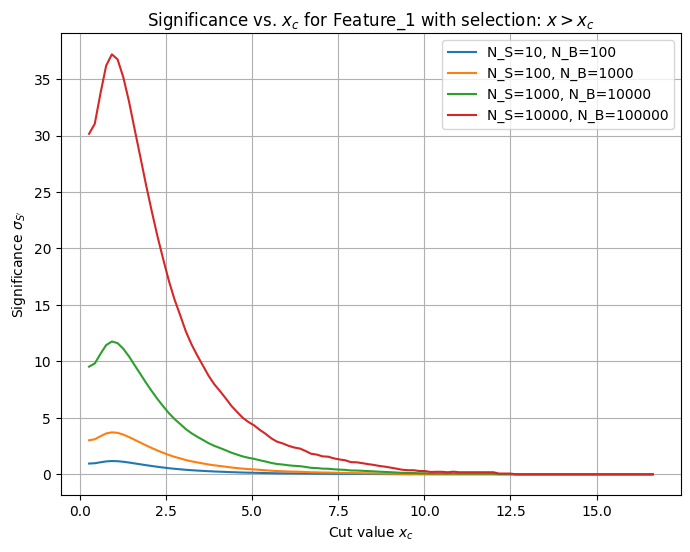

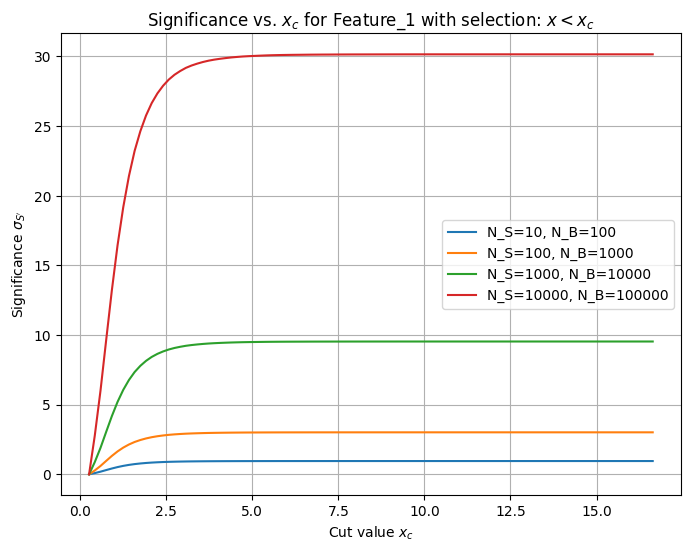

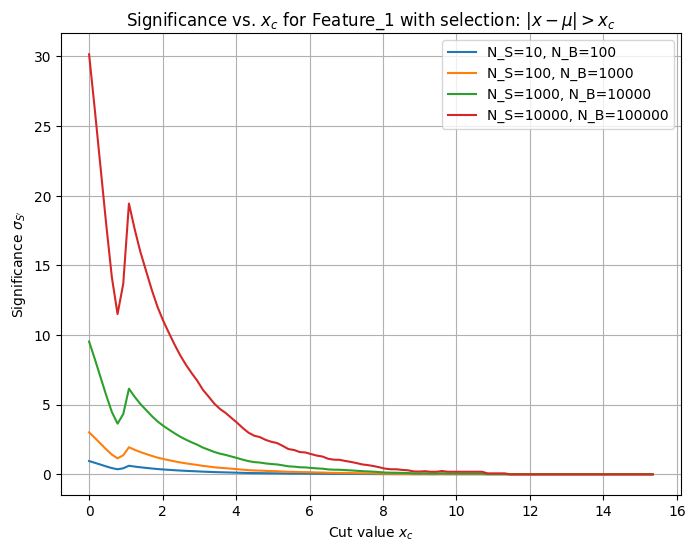

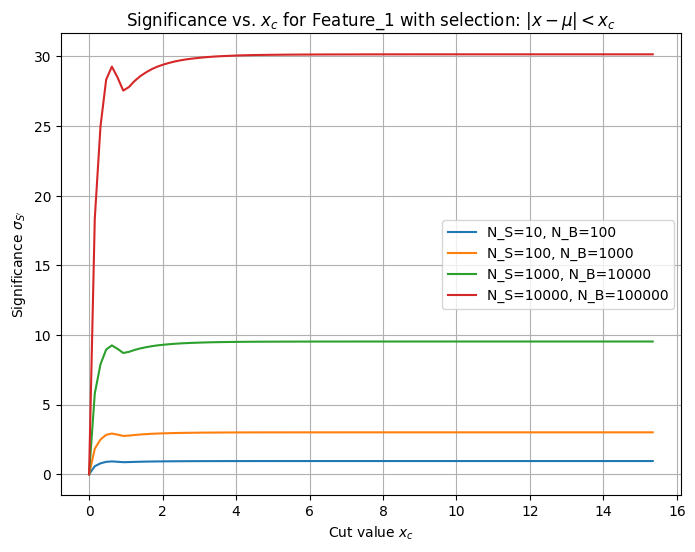

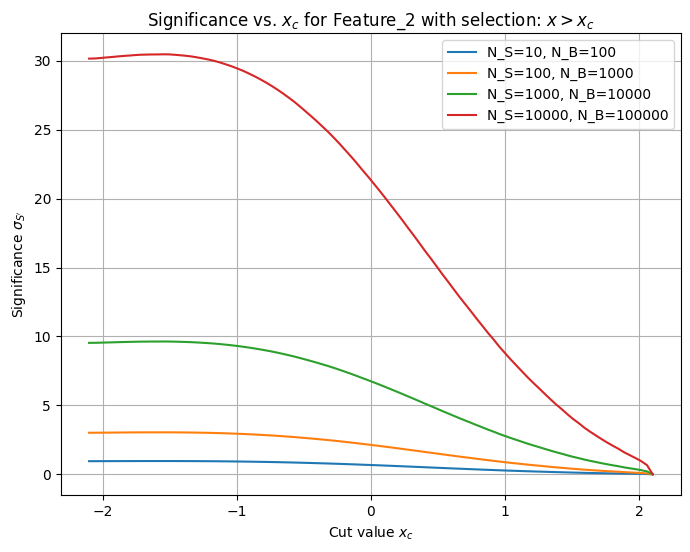

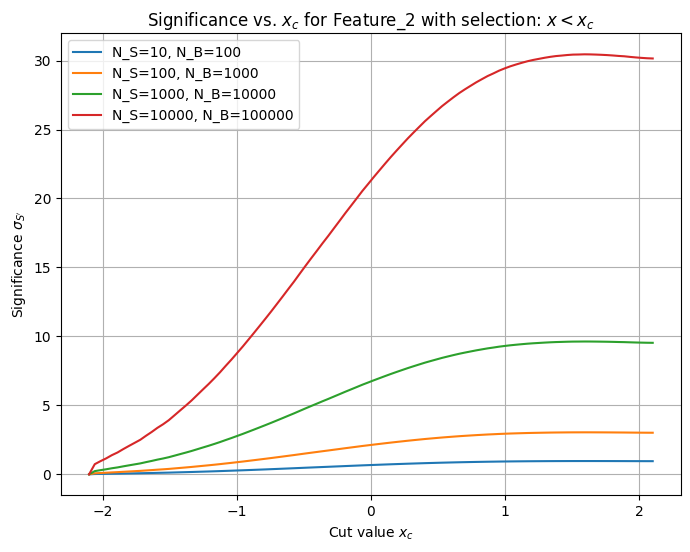

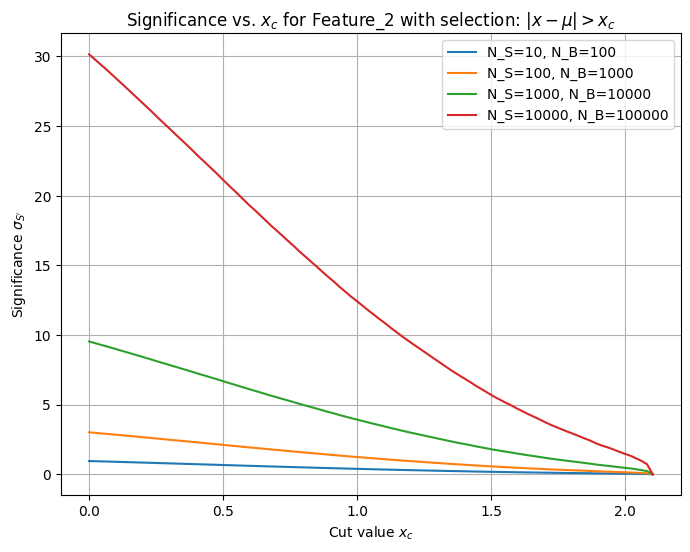

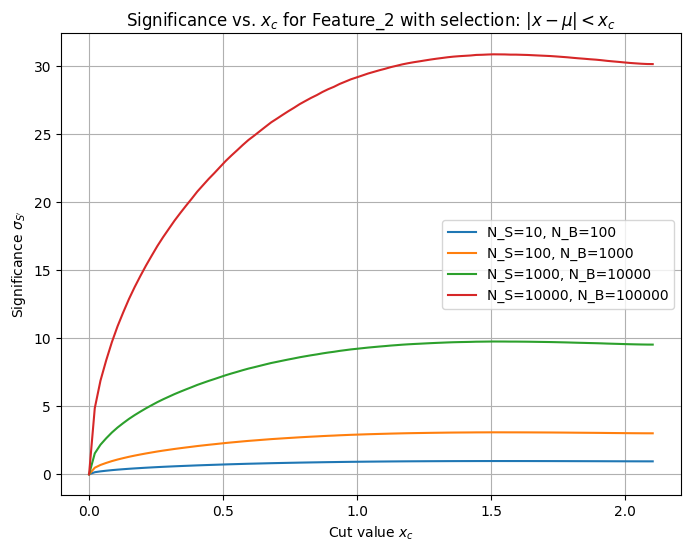

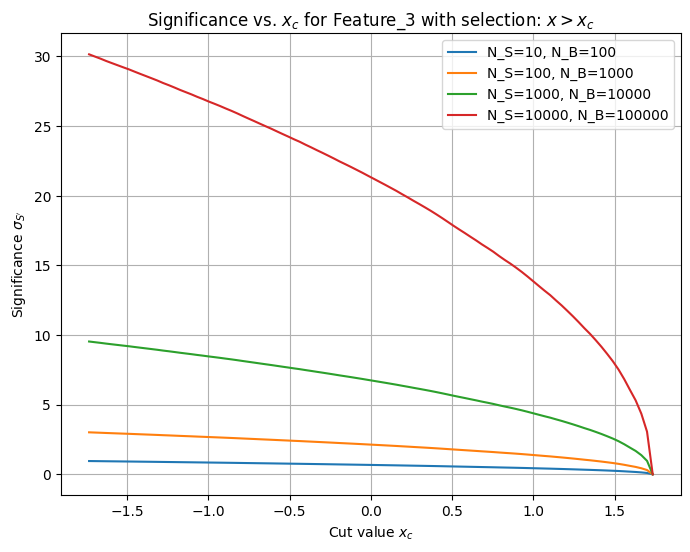

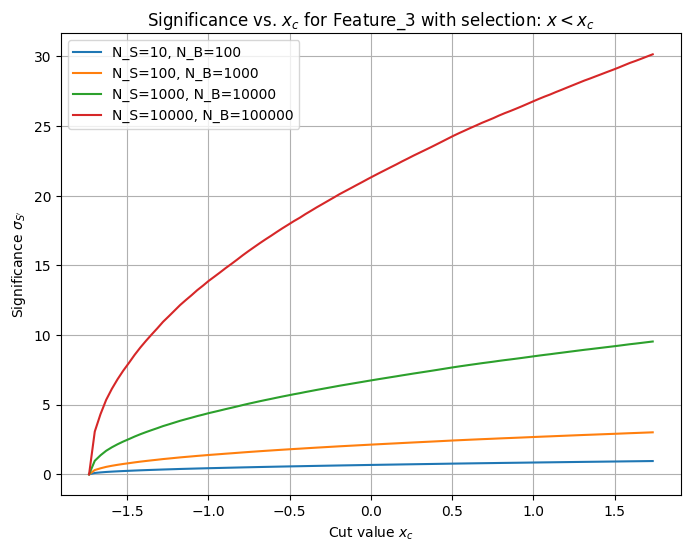

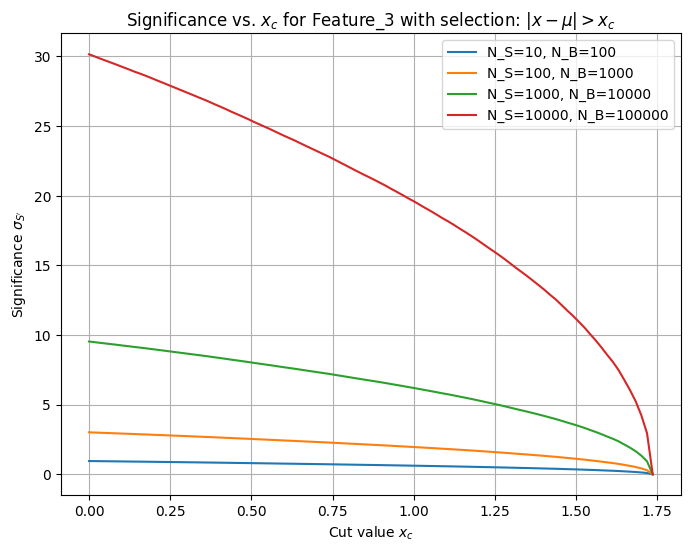

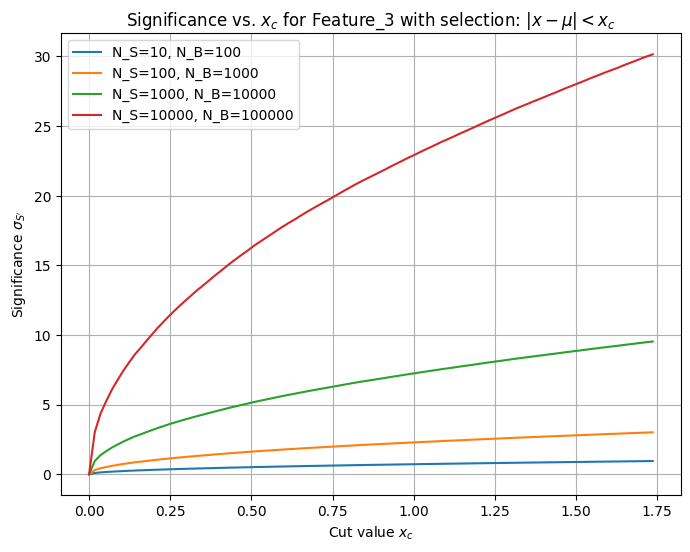

In [56]:
def compute_significance(eff_S, eff_B, N_S, N_B, eps=1e-6):
    """Compute significance: sigma = N_S' / sqrt(N_S' + N_B')"""
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    return Np_S / np.sqrt(Np_S + Np_B + eps)

scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Loop over observables.
for obs in chosen_obs:
    sig = signal_values[obs]
    bkg = background_values[obs]
    mu = np.mean(sig)
    
    # Scan ranges as before.
    x_min = min(sig.min(), bkg.min())
    x_max = max(sig.max(), bkg.max())
    dev_max = max(np.abs(sig - mu).max(), np.abs(bkg - mu).max())
    
    # For each selection strategy, plot significance for each scenario.
    for label, (sel_func, rtype) in strategies.items():
        if rtype == "range":
            xcs = np.linspace(x_min, x_max, 100)
        else:
            xcs = np.linspace(0, dev_max, 100)
        
        plt.figure(figsize=(8,6))
        for (N_S, N_B) in scenarios:
            sig_vals = []
            for xc in xcs:
                if rtype == "range":
                    eff_S = np.mean(sel_func(sig, xc))
                    eff_B = np.mean(sel_func(bkg, xc))
                else:
                    eff_S = np.mean(sel_func(sig, xc, mu))
                    eff_B = np.mean(sel_func(bkg, xc, mu))
                sig_vals.append(compute_significance(eff_S, eff_B, N_S, N_B))
            plt.plot(xcs, sig_vals, label=f"N_S={N_S}, N_B={N_B}")
        
        plt.xlabel(r"Cut value $x_c$")
        plt.ylabel(r"Significance $\sigma_{S'}$")
        plt.title(f"Significance vs. $x_c$ for {obs} with selection: {label}")
        plt.legend()
        plt.grid(True)
        plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML


# Assume the first column is the label (1 for signal, 0 for background) and the rest are features.
label_col = df.columns[0]
feature_cols = df.columns[1:]

# Split into signal and background dataframes.
signal_df = df[df[label_col] == 1]
background_df = df[df[label_col] == 0]

# For this exercise, choose the first 3 observables.
chosen_obs = feature_cols[:3]
print("Chosen observables:", chosen_obs.tolist())

# Convert chosen observables to NumPy arrays.
signal_data = signal_df[chosen_obs].values
background_data = background_df[chosen_obs].values


Chosen observables: ['Feature_1', 'Feature_2', 'Feature_3']


In [42]:
# For obs1 and obs2, choose the 25th percentile of the signal distribution.
cut1 = signal_df[chosen_obs[0]].quantile(0.25)
cut2 = signal_df[chosen_obs[1]].quantile(0.25)

# For obs3, compute the mean and standard deviation.
mu3 = signal_df[chosen_obs[2]].mean()
std3 = signal_df[chosen_obs[2]].std()
cut3 = 0.3 * std3  # window cut width

print("Optimal cuts determined from signal distributions:")
print(f"  {chosen_obs[0]} > {cut1:.3f}")
print(f"  {chosen_obs[1]} > {cut2:.3f}")
print(f"  |{chosen_obs[2]} - {mu3:.3f}| < {cut3:.3f}")


Optimal cuts determined from signal distributions:
  Feature_1 > 0.753
  Feature_2 > -0.622
  |Feature_3 - -0.002| < 0.301


In [43]:
def sel_obs1(data, cut_val):
    # Selection: observable1 > cut_val
    return data[:, 0] > cut_val

def sel_obs2(data, cut_val):
    # Selection: observable2 > cut_val
    return data[:, 1] > cut_val

def sel_obs3(data, cut_val, mu):
    # Selection: |observable3 - mu| < cut_val
    return np.abs(data[:, 2] - mu) < cut_val

def cut_flow_table(signal_data, background_data, cuts, scenario):
    # scenario: tuple (N_S, N_B) representing expected event counts.
    N_S, N_B = scenario
    rows = []
    
    # Step 0: No cut.
    eff_S = 1.0
    eff_B = 1.0
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    sig = Np_S / np.sqrt(Np_S + Np_B)
    rows.append(["No cut", f"{eff_S:.3f}", f"{eff_B:.3f}", f"{Np_S:.1f}", f"{Np_B:.1f}", f"{sig:.3f}"])
    
    # Step 1: Apply cut on obs1.
    mask_S = sel_obs1(signal_data, cuts['obs1'])
    mask_B = sel_obs1(background_data, cuts['obs1'])
    eff_S = np.mean(mask_S)
    eff_B = np.mean(mask_B)
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    sig = Np_S / np.sqrt(Np_S + Np_B)
    rows.append([f"{chosen_obs[0]} > {cuts['obs1']:.3f}", f"{eff_S:.3f}", f"{eff_B:.3f}", f"{Np_S:.1f}", f"{Np_B:.1f}", f"{sig:.3f}"])
    
    # Step 2: Apply cuts on obs1 and obs2.
    mask_S = sel_obs1(signal_data, cuts['obs1']) & sel_obs2(signal_data, cuts['obs2'])
    mask_B = sel_obs1(background_data, cuts['obs1']) & sel_obs2(background_data, cuts['obs2'])
    eff_S = np.mean(mask_S)
    eff_B = np.mean(mask_B)
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    sig = Np_S / np.sqrt(Np_S + Np_B)
    rows.append([f"{chosen_obs[0]} > {cuts['obs1']:.3f} and {chosen_obs[1]} > {cuts['obs2']:.3f}", 
                 f"{eff_S:.3f}", f"{eff_B:.3f}", f"{Np_S:.1f}", f"{Np_B:.1f}", f"{sig:.3f}"])
    
    # Step 3: Apply cuts on obs1, obs2, and obs3.
    mask_S = sel_obs1(signal_data, cuts['obs1']) & sel_obs2(signal_data, cuts['obs2']) & sel_obs3(signal_data, cuts['obs3'], mu3)
    mask_B = sel_obs1(background_data, cuts['obs1']) & sel_obs2(background_data, cuts['obs2']) & sel_obs3(background_data, cuts['obs3'], mu3)
    eff_S = np.mean(mask_S)
    eff_B = np.mean(mask_B)
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    sig = Np_S / np.sqrt(Np_S + Np_B)
    rows.append([f"{chosen_obs[0]} > {cuts['obs1']:.3f}, {chosen_obs[1]} > {cuts['obs2']:.3f} and |{chosen_obs[2]}-μ| < {cuts['obs3']:.3f}",
                 f"{eff_S:.3f}", f"{eff_B:.3f}", f"{Np_S:.1f}", f"{Np_B:.1f}", f"{sig:.3f}"])
    
    df_flow = pd.DataFrame(rows, columns=["Cut", "ε_S", "ε_B", "N'_S", "N'_B", "σ_S'"])
    return df_flow

# Define the chosen cuts.
cuts = {
    'obs1': cut1,
    'obs2': cut2,
    'obs3': cut3
}

# Define scenarios (expected event counts).
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Display the cut-flow table for each scenario.
for scenario in scenarios:
    df_cutflow = cut_flow_table(signal_data, background_data, cuts, scenario)
    display(HTML(f"<h3>Cut-Flow Table for Scenario: N_S = {scenario[0]}, N_B = {scenario[1]}</h3>"))
    display(HTML(tabulate(df_cutflow, headers='keys', tablefmt='html', showindex=False)))


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
No cut,1,1,10,100,0.953
Feature_1 > 0.753,0.75,0.354,7.5,35.4,1.145
Feature_1 > 0.753 and Feature_2 > -0.622,0.569,0.242,5.7,24.2,1.042
"Feature_1 > 0.753, Feature_2 > -0.622 and |Feature_3-μ| < 0.301",0.099,0.042,1,4.2,0.433


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
No cut,1,1,100,1000,3.015
Feature_1 > 0.753,0.75,0.354,75,354.3,3.62
Feature_1 > 0.753 and Feature_2 > -0.622,0.569,0.242,56.9,241.8,3.294
"Feature_1 > 0.753, Feature_2 > -0.622 and |Feature_3-μ| < 0.301",0.099,0.042,9.9,42.1,1.37


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
No cut,1,1,1000,10000,9.535
Feature_1 > 0.753,0.75,0.354,750,3542.9,11.447
Feature_1 > 0.753 and Feature_2 > -0.622,0.569,0.242,569.4,2417.9,10.417
"Feature_1 > 0.753, Feature_2 > -0.622 and |Feature_3-μ| < 0.301",0.099,0.042,98.8,420.8,4.333


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
No cut,1,1,10000,100000,30.151
Feature_1 > 0.753,0.75,0.354,7500,35429.1,36.198
Feature_1 > 0.753 and Feature_2 > -0.622,0.569,0.242,5693.7,24179.1,32.942
"Feature_1 > 0.753, Feature_2 > -0.622 and |Feature_3-μ| < 0.301",0.099,0.042,987.6,4207.9,13.701


Correlation matrix (signal):
           Feature_1  Feature_2  Feature_3
Feature_1   1.000000  -0.002331  -0.002187
Feature_2  -0.002331   1.000000  -0.000766
Feature_3  -0.002187  -0.000766   1.000000


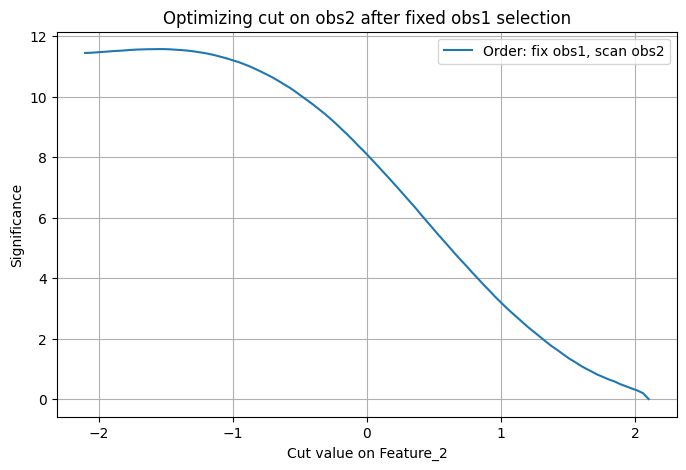

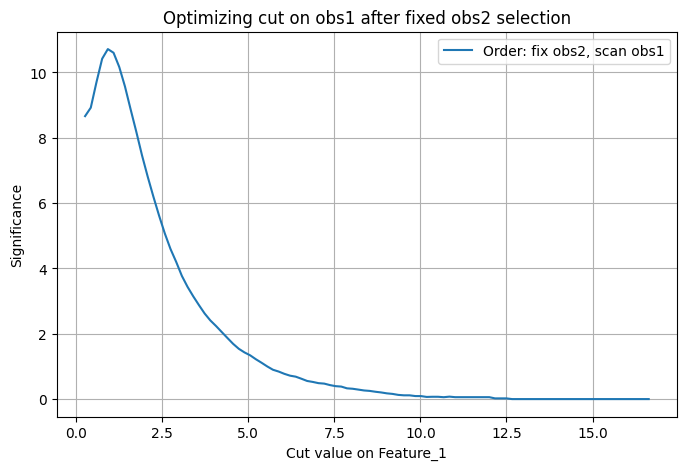

Order 1 (fix Feature_1 then scan Feature_2): Optimal Feature_2 cut = -1.551, max significance = 11.574
Order 2 (fix Feature_2 then scan Feature_1): Optimal Feature_1 cut = 0.917, max significance = 10.710


In [44]:
# Compute and display the correlation matrix for the chosen observables (using signal data).
corr_matrix = np.corrcoef(signal_data, rowvar=False)
print("Correlation matrix (signal):")
print(pd.DataFrame(corr_matrix, index=chosen_obs, columns=chosen_obs))

# Define selection functions for obs1 and obs2 (already defined above, but reusing for clarity).
def sel_obs1(data, cut_val):
    return data[:, 0] > cut_val

def sel_obs2(data, cut_val):
    return data[:, 1] > cut_val

def compute_significance(eff_S, eff_B, N_S, N_B, eps=1e-6):
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    return Np_S / np.sqrt(Np_S + Np_B + eps)

# Choose a scenario for optimization (e.g., N_S = 1000, N_B = 10000)
N_S_example, N_B_example = 1000, 10000

# --- Order 1: Fix obs1 cut (cut1) then optimize obs2 ---
fixed_obs1_cut = cut1  # fixed value determined earlier
mask_sig_obs1 = sel_obs1(signal_data, fixed_obs1_cut)
mask_bkg_obs1 = sel_obs1(background_data, fixed_obs1_cut)

obs2_vals = np.linspace(min(signal_data[:,1].min(), background_data[:,1].min()),
                        max(signal_data[:,1].max(), background_data[:,1].max()), 100)
sig_order1 = []
for cut_val in obs2_vals:
    mask_sig = mask_sig_obs1 & sel_obs2(signal_data, cut_val)
    mask_bkg = mask_bkg_obs1 & sel_obs2(background_data, cut_val)
    eff_S = np.mean(mask_sig)
    eff_B = np.mean(mask_bkg)
    sig_order1.append(compute_significance(eff_S, eff_B, N_S_example, N_B_example))
    
optimal_obs2 = obs2_vals[np.argmax(sig_order1)]
max_sig_order1 = np.max(sig_order1)

plt.figure(figsize=(8,5))
plt.plot(obs2_vals, sig_order1, label='Order: fix obs1, scan obs2')
plt.xlabel(f'Cut value on {chosen_obs[1]}')
plt.ylabel('Significance')
plt.title('Optimizing cut on obs2 after fixed obs1 selection')
plt.legend()
plt.grid(True)
plt.show()

# --- Order 2: Fix obs2 cut (cut2) then optimize obs1 ---
fixed_obs2_cut = cut2  # fixed value determined earlier
mask_sig_obs2 = sel_obs2(signal_data, fixed_obs2_cut)
mask_bkg_obs2 = sel_obs2(background_data, fixed_obs2_cut)

obs1_vals = np.linspace(min(signal_data[:,0].min(), background_data[:,0].min()),
                        max(signal_data[:,0].max(), background_data[:,0].max()), 100)
sig_order2 = []
for cut_val in obs1_vals:
    mask_sig = mask_sig_obs2 & sel_obs1(signal_data, cut_val)
    mask_bkg = mask_bkg_obs2 & sel_obs1(background_data, cut_val)
    eff_S = np.mean(mask_sig)
    eff_B = np.mean(mask_bkg)
    sig_order2.append(compute_significance(eff_S, eff_B, N_S_example, N_B_example))
    
optimal_obs1 = obs1_vals[np.argmax(sig_order2)]
max_sig_order2 = np.max(sig_order2)

plt.figure(figsize=(8,5))
plt.plot(obs1_vals, sig_order2, label='Order: fix obs2, scan obs1')
plt.xlabel(f'Cut value on {chosen_obs[0]}')
plt.ylabel('Significance')
plt.title('Optimizing cut on obs1 after fixed obs2 selection')
plt.legend()
plt.grid(True)
plt.show()

print(f"Order 1 (fix {chosen_obs[0]} then scan {chosen_obs[1]}): Optimal {chosen_obs[1]} cut = {optimal_obs2:.3f}, max significance = {max_sig_order1:.3f}")
print(f"Order 2 (fix {chosen_obs[1]} then scan {chosen_obs[0]}): Optimal {chosen_obs[0]} cut = {optimal_obs1:.3f}, max significance = {max_sig_order2:.3f}")


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [46]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 19.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 20.6 MB/s eta 0:00:0000:0100:01


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, auc


# The first column is the label (1 for signal, 0 for background), rest are features.
label_col = df.columns[0]
feature_cols = df.columns[1:]

# Split the dataset into signal and background DataFrames.
signal_df = df[df[label_col] == 1]
background_df = df[df[label_col] == 0]

# Choose the first 3 observables (features) for these exercises.
chosen_obs = feature_cols[:3]
print("Chosen observables:", chosen_obs.tolist())

# For later use, convert the chosen observables to NumPy arrays.
signal_data = signal_df[chosen_obs].values
background_data = background_df[chosen_obs].values

# For Exercise 6 (and here) we defined arbitrary cut values.
# For demonstration, we use:
# - For obs1 and obs2: the 25th percentile of the signal distribution.
# - For obs3: a window cut centered on the signal mean with width = 0.3×std.
cut1 = signal_df[chosen_obs[0]].quantile(0.25)
cut2 = signal_df[chosen_obs[1]].quantile(0.25)
mu3 = signal_df[chosen_obs[2]].mean()
std3 = signal_df[chosen_obs[2]].std()
cut3 = 0.3 * std3

print("Cut values:")
print(f"  {chosen_obs[0]} > {cut1:.3f}")
print(f"  {chosen_obs[1]} > {cut2:.3f}")
print(f"  |{chosen_obs[2]} - {mu3:.3f}| < {cut3:.3f}")


Chosen observables: ['Feature_1', 'Feature_2', 'Feature_3']
Cut values:
  Feature_1 > 0.753
  Feature_2 > -0.622
  |Feature_3 - -0.002| < 0.301


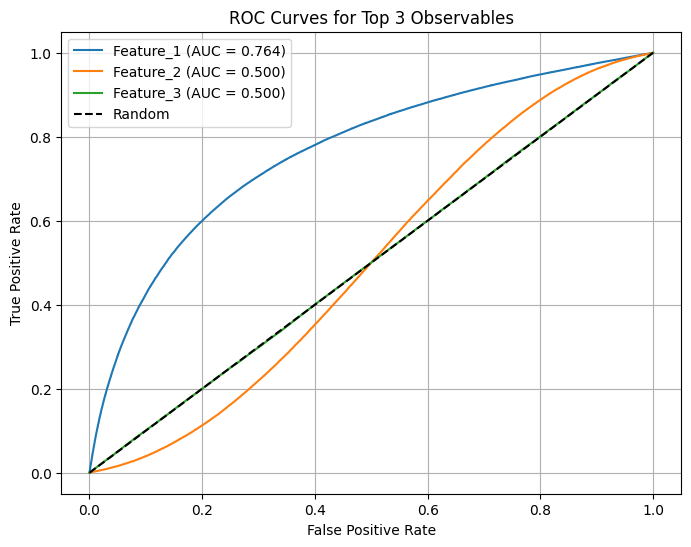

In [49]:
plt.figure(figsize=(8,6))
for obs in chosen_obs:
    # Create ground truth vector: 1 for signal, 0 for background.
    y_true = np.concatenate((np.ones(len(signal_df)), np.zeros(len(background_df))))
    # Use the observable’s values as the classifier scores.
    scores = np.concatenate((signal_df[obs].values, background_df[obs].values))
    
    # If a lower score means more signal, you may want to invert scores.
    # For now we assume higher values indicate signal.
    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{obs} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Top 3 Observables")
plt.legend()
plt.grid(True)
plt.show()


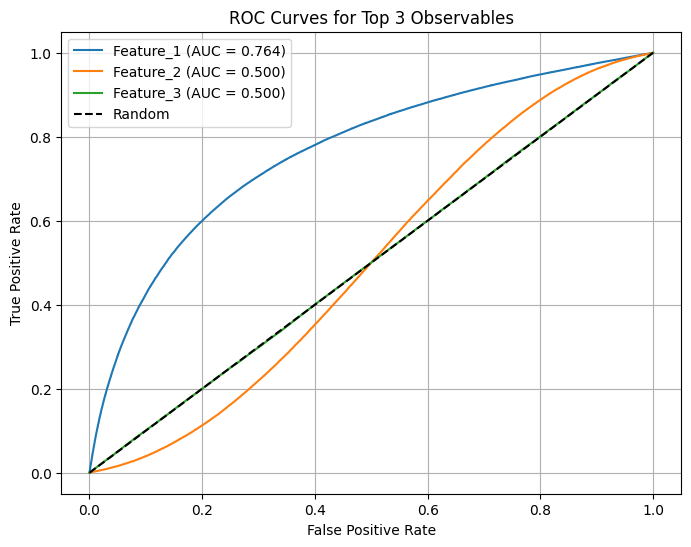

In [50]:
def plot_roc_curves(observables, signal_df, background_df, title="ROC Curves"):
    """
    Plots ROC curves for the given observables.
    
    Parameters:
      observables : list of str
          List of column names to use as scores.
      signal_df : pd.DataFrame
          DataFrame containing signal events.
      background_df : pd.DataFrame
          DataFrame containing background events.
      title : str
          Title for the plot.
    """
    plt.figure(figsize=(8,6))
    
    # Build ground truth and loop over observables.
    y_true = np.concatenate((np.ones(len(signal_df)), np.zeros(len(background_df))))
    for obs in observables:
        scores = np.concatenate((signal_df[obs].values, background_df[obs].values))
        fpr, tpr, _ = roc_curve(y_true, scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{obs} (AUC = {roc_auc:.3f})")
    
    plt.plot([0,1], [0,1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage for the top 3 observables:
plot_roc_curves(chosen_obs.tolist(), signal_df, background_df, title="ROC Curves for Top 3 Observables")


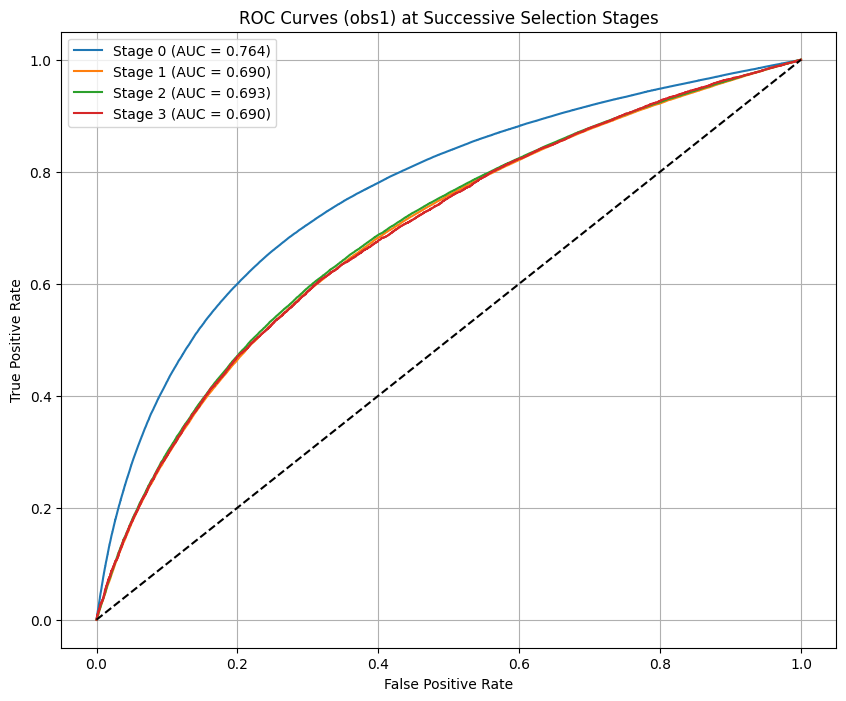

In [51]:
def get_subset(signal_df, background_df, stage):
    """
    Returns subsets of signal and background DataFrames after applying successive cuts.
    
    stage: 
      0 -> no cut;
      1 -> obs1 > cut1;
      2 -> obs1 > cut1 and obs2 > cut2;
      3 -> obs1 > cut1, obs2 > cut2, and |obs3 - mu3| < cut3.
    """
    if stage == 0:
        return signal_df, background_df
    elif stage == 1:
        s = signal_df[signal_df[chosen_obs[0]] > cut1]
        b = background_df[background_df[chosen_obs[0]] > cut1]
        return s, b
    elif stage == 2:
        s = signal_df[(signal_df[chosen_obs[0]] > cut1) & (signal_df[chosen_obs[1]] > cut2)]
        b = background_df[(background_df[chosen_obs[0]] > cut1) & (background_df[chosen_obs[1]] > cut2)]
        return s, b
    elif stage == 3:
        s = signal_df[(signal_df[chosen_obs[0]] > cut1) & 
                      (signal_df[chosen_obs[1]] > cut2) & 
                      (np.abs(signal_df[chosen_obs[2]] - mu3) < cut3)]
        b = background_df[(background_df[chosen_obs[0]] > cut1) & 
                          (background_df[chosen_obs[1]] > cut2) & 
                          (np.abs(background_df[chosen_obs[2]] - mu3) < cut3)]
        return s, b

stages = [0, 1, 2, 3]
plt.figure(figsize=(10,8))
for stage in stages:
    s_sub, b_sub = get_subset(signal_df, background_df, stage)
    y_true = np.concatenate((np.ones(len(s_sub)), np.zeros(len(b_sub))))
    # Here we use obs1 as the classifier score. You could choose another observable.
    scores = np.concatenate((s_sub[chosen_obs[0]].values, b_sub[chosen_obs[0]].values))
    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Stage {stage} (AUC = {roc_auc:.3f})")
    
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (obs1) at Successive Selection Stages")
plt.legend()
plt.grid(True)
plt.show()


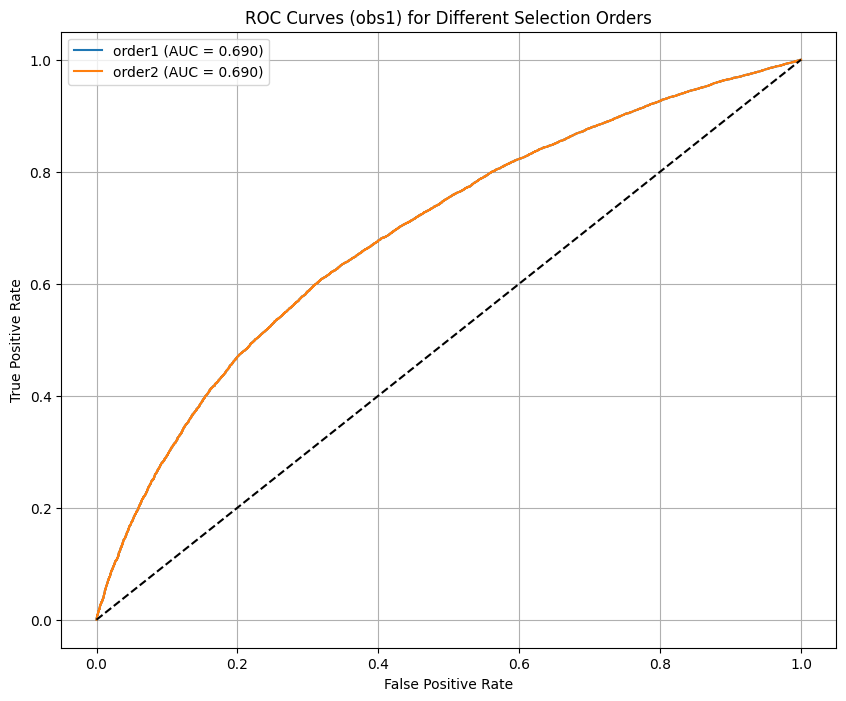

Comparing the two orders may reveal differences in the ROC AUC and overall performance,
indicating that the ordering of cuts can affect the final significance if observables are correlated.


In [52]:
def get_subset_order(signal_df, background_df, order):
    """
    Returns subsets after applying cuts in a given order.
    
    order: a string, either "order1" or "order2".
      "order1": Apply obs1 > cut1, then obs2 > cut2, then |obs3 - mu3| < cut3.
      "order2": Apply obs2 > cut2, then obs1 > cut1, then |obs3 - mu3| < cut3.
    """
    if order == "order1":
        s = signal_df[(signal_df[chosen_obs[0]] > cut1) &
                      (signal_df[chosen_obs[1]] > cut2) &
                      (np.abs(signal_df[chosen_obs[2]] - mu3) < cut3)]
        b = background_df[(background_df[chosen_obs[0]] > cut1) &
                          (background_df[chosen_obs[1]] > cut2) &
                          (np.abs(background_df[chosen_obs[2]] - mu3) < cut3)]
    elif order == "order2":
        s = signal_df[(signal_df[chosen_obs[1]] > cut2) &
                      (signal_df[chosen_obs[0]] > cut1) &
                      (np.abs(signal_df[chosen_obs[2]] - mu3) < cut3)]
        b = background_df[(background_df[chosen_obs[1]] > cut2) &
                          (background_df[chosen_obs[0]] > cut1) &
                          (np.abs(background_df[chosen_obs[2]] - mu3) < cut3)]
    return s, b

orders = ["order1", "order2"]
plt.figure(figsize=(10,8))
for order in orders:
    s_order, b_order = get_subset_order(signal_df, background_df, order)
    y_true = np.concatenate((np.ones(len(s_order)), np.zeros(len(b_order))))
    # Again, we use obs1 as the score.
    scores = np.concatenate((s_order[chosen_obs[0]].values, b_order[chosen_obs[0]].values))
    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{order} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (obs1) for Different Selection Orders")
plt.legend()
plt.grid(True)
plt.show()

print("Comparing the two orders may reveal differences in the ROC AUC and overall performance,\nindicating that the ordering of cuts can affect the final significance if observables are correlated.")


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

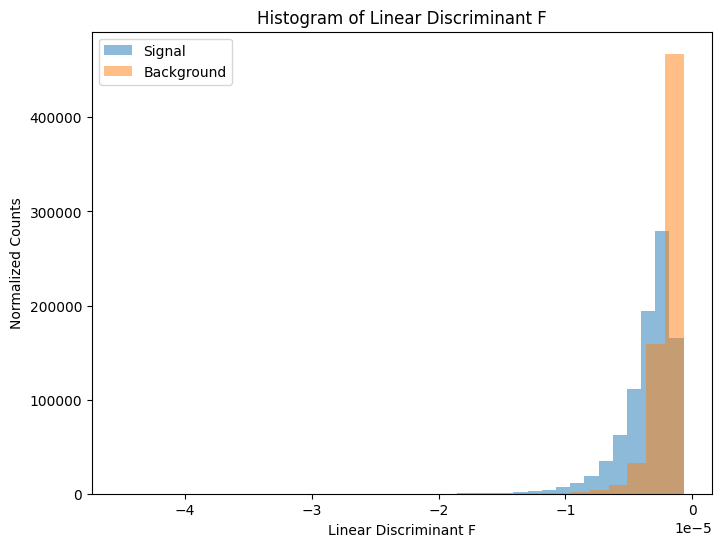

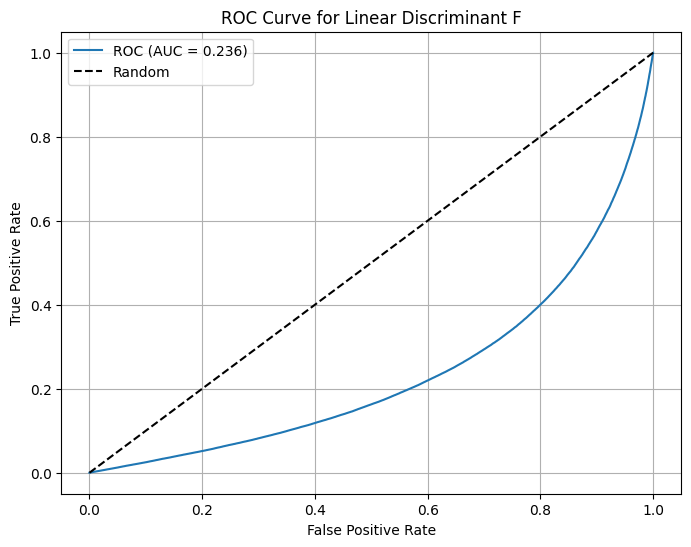

Maximal significance for each scenario (using F as discriminator):
  Scenario N_S = 10, N_B = 100: Max significance = 0.953 (optimal threshold F = -0.000)
  Scenario N_S = 100, N_B = 1000: Max significance = 3.015 (optimal threshold F = -0.000)
  Scenario N_S = 1000, N_B = 10000: Max significance = 9.535 (optimal threshold F = -0.000)
  Scenario N_S = 10000, N_B = 100000: Max significance = 30.151 (optimal threshold F = -0.000)


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# We assume:
#   - The first column is the label (1 for signal, 0 for background).
#   - The remaining columns are features.
#   - We use the first 3 features (stored in chosen_obs) as our observables.

label_col = df.columns[0]
feature_cols = df.columns[1:]
# Use first 3 observables.
chosen_obs = feature_cols[:3]

# Split into signal and background DataFrames.
signal_df = df[df[label_col] == 1]
background_df = df[df[label_col] == 0]

# Convert chosen observables to numpy arrays.
signal_data = signal_df[chosen_obs].values  # shape (n_signal, d)
background_data = background_df[chosen_obs].values  # shape (n_background, d)

# --- Compute class means ---
m1 = np.mean(signal_data, axis=0)    # mean of signal (category 1)
m2 = np.mean(background_data, axis=0)  # mean of background (category 2)

# --- Compute between-class scatter matrix S_B ---
# S_B = (m2 - m1)(m2 - m1)^T
diff = (m2 - m1).reshape(-1, 1)  # column vector, shape (d,1)
S_B = diff @ diff.T             # shape (d,d)

# --- Compute within-class scatter matrix S_W ---
d = signal_data.shape[1]
S_W = np.zeros((d, d))
# Sum over signal events.
for x in signal_data:
    diff_x = (x - m1).reshape(-1, 1)
    S_W += diff_x @ diff_x.T
# Sum over background events.
for x in background_data:
    diff_x = (x - m2).reshape(-1, 1)
    S_W += diff_x @ diff_x.T

# --- Compute linear discriminant coefficients ---
w = np.linalg.inv(S_W) @ (m2 - m1)  # shape (d,)

# --- Compute discriminant F for each event: F = w^T x ---
F_signal = signal_data @ w   # shape (n_signal,)
F_background = background_data @ w  # shape (n_background,)

# --- Plot histograms of F for signal and background ---
plt.figure(figsize=(8,6))
plt.hist(F_signal, bins=30, alpha=0.5, label='Signal', density=True)
plt.hist(F_background, bins=30, alpha=0.5, label='Background', density=True)
plt.xlabel("Linear Discriminant F")
plt.ylabel("Normalized Counts")
plt.title("Histogram of Linear Discriminant F")
plt.legend()
plt.show()

# --- Compute and plot ROC curve for F ---
y_true = np.concatenate((np.ones(len(F_signal)), np.zeros(len(F_background))))
scores = np.concatenate((F_signal, F_background))
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Linear Discriminant F")
plt.legend()
plt.grid(True)
plt.show()

# --- Compute maximal significance for several scenarios ---
# Significance: sigma_S' = N_S' / sqrt(N_S' + N_B') with N_S' = epsilon_S * N_S and N_B' = epsilon_B * N_B.
def compute_significance(eff_S, eff_B, N_S, N_B, eps=1e-6):
    Np_S = eff_S * N_S
    Np_B = eff_B * N_B
    return Np_S / np.sqrt(Np_S + Np_B + eps)

# For thresholds, assume we require F >= threshold (higher F -> more signal-like).
# For each threshold from the ROC computation, compute efficiencies.
eff_signal = np.array([np.mean(F_signal >= thr) for thr in thresholds])
eff_background = np.array([np.mean(F_background >= thr) for thr in thresholds])

# Define scenarios as in Exercise 5:
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

print("Maximal significance for each scenario (using F as discriminator):")
for (N_S, N_B) in scenarios:
    sig_values = compute_significance(eff_signal, eff_background, N_S, N_B)
    max_sig = np.max(sig_values)
    optimal_thr = thresholds[np.argmax(sig_values)]
    print(f"  Scenario N_S = {N_S}, N_B = {N_B}: Max significance = {max_sig:.3f} (optimal threshold F = {optimal_thr:.3f})")
